**Google Drive Bağlantısı**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%pip install -U ultralytics sahi imantics fiftyone fastapi python-multipart uvicorn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.7/645.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
from sahi.utils.yolov8 import download_yolov8s_model
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from pathlib import Path
from IPython.display import Image

In [6]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path="/content/drive/MyDrive/weights/best.pt",
    confidence_threshold=0.5,
    device="cuda:0",  # or 'cuda:0'
)

In [ ]:
result = get_prediction("/content/cars.jpg", detection_model)

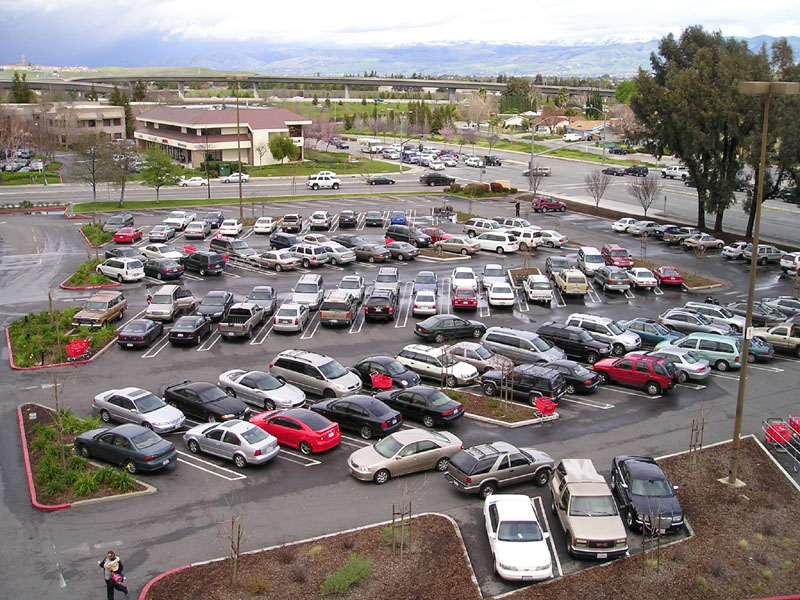

In [ ]:
result.export_visuals(export_dir="/content/")
Image("/content/prediction_visual.png")

In [8]:
result = get_sliced_prediction(
    "/content/cars.jpg",
    detection_model,
    slice_height=128,
    slice_width=128,
    overlap_height_ratio=0.8,
    overlap_width_ratio=0.8
)

Performing prediction on 540 number of slices.


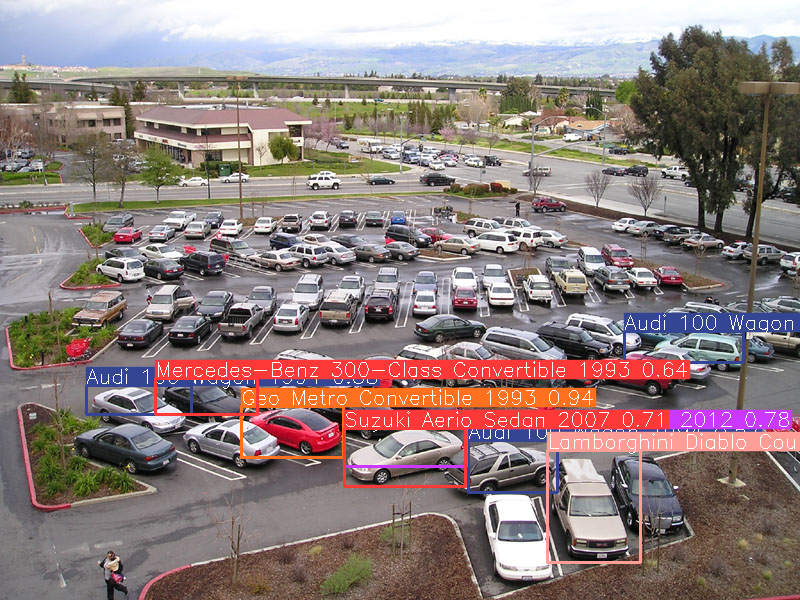

In [9]:
result.export_visuals(export_dir="/content/")
Image("/content/prediction_visual.png")

In [11]:
# Access the object prediction list
object_prediction_list = result.object_prediction_list

# Convert to COCO annotation, COCO prediction, imantics, and fiftyone formats
result.to_coco_annotations()[:3]
result.to_coco_predictions(image_id=1)[:3]
result.to_imantics_annotations()[:3]

In [ ]:
predict(
    model_type="yolov8",
    model_path="/content/drive/MyDrive/weights/best.pt",
    model_device="cuda:0",  # or 'cuda:0'
    model_confidence_threshold=0.7,
    source="/content/drive/MyDrive/traffic.mp4",
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)

Performing inference on video frames:   0%|          | 0/1800 [00:00<?, ?it/s]

Performing prediction on 209 number of slices.


Performing inference on video frames:   0%|          | 1/1800 [00:22<11:16:14, 22.55s/it]

Prediction time is: 22137.68 ms


Performing inference on video frames:   0%|          | 1/1800 [00:22<11:16:14, 22.55s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   0%|          | 2/1800 [00:37<8:57:42, 17.94s/it] 

Prediction time is: 14492.86 ms


Performing inference on video frames:   0%|          | 2/1800 [00:37<8:57:42, 17.94s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   0%|          | 3/1800 [00:52<8:17:40, 16.62s/it]

Prediction time is: 14808.98 ms


Performing inference on video frames:   0%|          | 3/1800 [00:52<8:17:40, 16.62s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   0%|          | 4/1800 [01:07<8:00:49, 16.06s/it]

Prediction time is: 15005.36 ms


Performing inference on video frames:   0%|          | 4/1800 [01:07<8:00:49, 16.06s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   0%|          | 5/1800 [01:22<7:49:36, 15.70s/it]

Prediction time is: 14852.00 ms


Performing inference on video frames:   0%|          | 5/1800 [01:22<7:49:36, 15.70s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   0%|          | 6/1800 [01:37<7:41:20, 15.43s/it]

Prediction time is: 14699.76 ms


Performing inference on video frames:   0%|          | 6/1800 [01:37<7:41:20, 15.43s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   0%|          | 7/1800 [01:52<7:36:01, 15.26s/it]

Prediction time is: 14667.24 ms


Performing inference on video frames:   0%|          | 7/1800 [01:52<7:36:01, 15.26s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   0%|          | 8/1800 [02:07<7:33:30, 15.18s/it]

Prediction time is: 14737.34 ms


Performing inference on video frames:   0%|          | 8/1800 [02:07<7:33:30, 15.18s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   0%|          | 9/1800 [02:22<7:32:18, 15.15s/it]

Prediction time is: 14788.25 ms


Performing inference on video frames:   0%|          | 9/1800 [02:22<7:32:18, 15.15s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   1%|          | 10/1800 [02:37<7:31:29, 15.13s/it]

Prediction time is: 14795.77 ms


Performing inference on video frames:   1%|          | 10/1800 [02:37<7:31:29, 15.13s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   1%|          | 11/1800 [02:52<7:30:45, 15.12s/it]

Prediction time is: 14785.13 ms


Performing inference on video frames:   1%|          | 11/1800 [02:52<7:30:45, 15.12s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   1%|          | 12/1800 [03:07<7:29:53, 15.10s/it]

Prediction time is: 14750.75 ms


Performing inference on video frames:   1%|          | 12/1800 [03:07<7:29:53, 15.10s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   1%|          | 13/1800 [03:22<7:28:58, 15.07s/it]

Prediction time is: 14745.09 ms


Performing inference on video frames:   1%|          | 13/1800 [03:23<7:28:58, 15.07s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   1%|          | 14/1800 [03:37<7:28:42, 15.07s/it]

Prediction time is: 14753.82 ms


Performing inference on video frames:   1%|          | 14/1800 [03:38<7:28:42, 15.07s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   1%|          | 15/1800 [03:52<7:28:18, 15.07s/it]

Prediction time is: 14763.54 ms


Performing inference on video frames:   1%|          | 15/1800 [03:53<7:28:18, 15.07s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   1%|          | 16/1800 [04:08<7:28:35, 15.09s/it]

Prediction time is: 14757.84 ms


Performing inference on video frames:   1%|          | 16/1800 [04:08<7:28:35, 15.09s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   1%|          | 17/1800 [04:23<7:28:50, 15.10s/it]

Prediction time is: 14771.63 ms


Performing inference on video frames:   1%|          | 17/1800 [04:23<7:28:50, 15.10s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   1%|          | 18/1800 [04:38<7:29:16, 15.13s/it]

Prediction time is: 14787.59 ms


Performing inference on video frames:   1%|          | 18/1800 [04:38<7:29:16, 15.13s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   1%|          | 19/1800 [04:53<7:29:31, 15.14s/it]

Prediction time is: 14811.76 ms


Performing inference on video frames:   1%|          | 19/1800 [04:53<7:29:31, 15.14s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   1%|          | 20/1800 [05:08<7:29:06, 15.14s/it]

Prediction time is: 14760.46 ms


Performing inference on video frames:   1%|          | 20/1800 [05:08<7:29:06, 15.14s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   1%|          | 21/1800 [05:23<7:29:11, 15.15s/it]

Prediction time is: 14803.10 ms


Performing inference on video frames:   1%|          | 21/1800 [05:24<7:29:11, 15.15s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   1%|          | 22/1800 [05:38<7:29:04, 15.15s/it]

Prediction time is: 14797.10 ms


Performing inference on video frames:   1%|          | 22/1800 [05:39<7:29:04, 15.15s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   1%|▏         | 23/1800 [05:54<7:28:58, 15.16s/it]

Prediction time is: 14789.52 ms


Performing inference on video frames:   1%|▏         | 23/1800 [05:54<7:28:58, 15.16s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   1%|▏         | 24/1800 [06:09<7:29:00, 15.17s/it]

Prediction time is: 14754.01 ms


Performing inference on video frames:   1%|▏         | 24/1800 [06:09<7:29:00, 15.17s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   1%|▏         | 25/1800 [06:24<7:29:04, 15.18s/it]

Prediction time is: 14769.68 ms


Performing inference on video frames:   1%|▏         | 25/1800 [06:24<7:29:04, 15.18s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   1%|▏         | 26/1800 [06:39<7:29:09, 15.19s/it]

Prediction time is: 14753.97 ms


Performing inference on video frames:   1%|▏         | 26/1800 [06:40<7:29:09, 15.19s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   2%|▏         | 27/1800 [06:54<7:29:15, 15.20s/it]

Prediction time is: 14768.43 ms


Performing inference on video frames:   2%|▏         | 27/1800 [06:55<7:29:15, 15.20s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   2%|▏         | 28/1800 [07:10<7:28:59, 15.20s/it]

Prediction time is: 14746.39 ms


Performing inference on video frames:   2%|▏         | 28/1800 [07:10<7:28:59, 15.20s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   2%|▏         | 29/1800 [07:25<7:28:54, 15.21s/it]

Prediction time is: 14769.79 ms


Performing inference on video frames:   2%|▏         | 29/1800 [07:25<7:28:54, 15.21s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   2%|▏         | 30/1800 [07:40<7:29:05, 15.22s/it]

Prediction time is: 14805.88 ms


Performing inference on video frames:   2%|▏         | 30/1800 [07:41<7:29:05, 15.22s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   2%|▏         | 31/1800 [07:55<7:29:02, 15.23s/it]

Prediction time is: 14755.72 ms


Performing inference on video frames:   2%|▏         | 31/1800 [07:56<7:29:02, 15.23s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   2%|▏         | 32/1800 [08:11<7:29:18, 15.25s/it]

Prediction time is: 14774.93 ms


Performing inference on video frames:   2%|▏         | 32/1800 [08:11<7:29:18, 15.25s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   2%|▏         | 33/1800 [08:26<7:29:07, 15.25s/it]

Prediction time is: 14726.48 ms


Performing inference on video frames:   2%|▏         | 33/1800 [08:26<7:29:07, 15.25s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   2%|▏         | 34/1800 [08:41<7:28:54, 15.25s/it]

Prediction time is: 14736.18 ms


Performing inference on video frames:   2%|▏         | 34/1800 [08:42<7:28:54, 15.25s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   2%|▏         | 35/1800 [08:56<7:28:41, 15.25s/it]

Prediction time is: 14733.93 ms


Performing inference on video frames:   2%|▏         | 35/1800 [08:57<7:28:41, 15.25s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   2%|▏         | 36/1800 [09:12<7:28:54, 15.27s/it]

Prediction time is: 14785.29 ms


Performing inference on video frames:   2%|▏         | 36/1800 [09:12<7:28:54, 15.27s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   2%|▏         | 37/1800 [09:27<7:28:18, 15.26s/it]

Prediction time is: 14717.76 ms


Performing inference on video frames:   2%|▏         | 37/1800 [09:27<7:28:18, 15.26s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   2%|▏         | 38/1800 [09:42<7:28:33, 15.27s/it]

Prediction time is: 14772.44 ms


Performing inference on video frames:   2%|▏         | 38/1800 [09:43<7:28:33, 15.27s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   2%|▏         | 39/1800 [09:58<7:29:04, 15.30s/it]

Prediction time is: 14791.03 ms


Performing inference on video frames:   2%|▏         | 39/1800 [09:58<7:29:04, 15.30s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   2%|▏         | 40/1800 [10:13<7:29:27, 15.32s/it]

Prediction time is: 14812.73 ms


Performing inference on video frames:   2%|▏         | 40/1800 [10:14<7:29:27, 15.32s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   2%|▏         | 41/1800 [10:28<7:29:31, 15.33s/it]

Prediction time is: 14763.30 ms


Performing inference on video frames:   2%|▏         | 41/1800 [10:29<7:29:31, 15.33s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   2%|▏         | 42/1800 [10:44<7:29:25, 15.34s/it]

Prediction time is: 14782.76 ms


Performing inference on video frames:   2%|▏         | 42/1800 [10:44<7:29:25, 15.34s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   2%|▏         | 43/1800 [10:59<7:29:04, 15.34s/it]

Prediction time is: 14748.45 ms


Performing inference on video frames:   2%|▏         | 43/1800 [11:00<7:29:04, 15.34s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   2%|▏         | 44/1800 [11:15<7:29:40, 15.36s/it]

Prediction time is: 14795.58 ms


Performing inference on video frames:   2%|▏         | 44/1800 [11:15<7:29:40, 15.36s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   2%|▎         | 45/1800 [11:30<7:29:14, 15.36s/it]

Prediction time is: 14727.35 ms


Performing inference on video frames:   2%|▎         | 45/1800 [11:30<7:29:14, 15.36s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   3%|▎         | 46/1800 [11:45<7:29:28, 15.38s/it]

Prediction time is: 14763.81 ms


Performing inference on video frames:   3%|▎         | 46/1800 [11:46<7:29:28, 15.38s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   3%|▎         | 47/1800 [12:01<7:28:42, 15.36s/it]

Prediction time is: 14720.32 ms


Performing inference on video frames:   3%|▎         | 47/1800 [12:01<7:28:42, 15.36s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   3%|▎         | 48/1800 [12:16<7:28:46, 15.37s/it]

Prediction time is: 14754.83 ms


Performing inference on video frames:   3%|▎         | 48/1800 [12:17<7:28:46, 15.37s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   3%|▎         | 49/1800 [12:31<7:28:39, 15.37s/it]

Prediction time is: 14749.20 ms


Performing inference on video frames:   3%|▎         | 49/1800 [12:32<7:28:39, 15.37s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   3%|▎         | 50/1800 [12:47<7:28:50, 15.39s/it]

Prediction time is: 14732.38 ms


Performing inference on video frames:   3%|▎         | 50/1800 [12:47<7:28:50, 15.39s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   3%|▎         | 51/1800 [13:02<7:28:33, 15.39s/it]

Prediction time is: 14724.33 ms


Performing inference on video frames:   3%|▎         | 51/1800 [13:03<7:28:33, 15.39s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   3%|▎         | 52/1800 [13:18<7:28:25, 15.39s/it]

Prediction time is: 14737.72 ms


Performing inference on video frames:   3%|▎         | 52/1800 [13:18<7:28:25, 15.39s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   3%|▎         | 53/1800 [13:33<7:28:17, 15.40s/it]

Prediction time is: 14736.69 ms


Performing inference on video frames:   3%|▎         | 53/1800 [13:34<7:28:17, 15.40s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   3%|▎         | 54/1800 [13:48<7:28:21, 15.41s/it]

Prediction time is: 14751.18 ms


Performing inference on video frames:   3%|▎         | 54/1800 [13:49<7:28:21, 15.41s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   3%|▎         | 55/1800 [14:04<7:29:03, 15.44s/it]

Prediction time is: 14822.22 ms


Performing inference on video frames:   3%|▎         | 55/1800 [14:05<7:29:03, 15.44s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   3%|▎         | 56/1800 [14:19<7:29:12, 15.45s/it]

Prediction time is: 14776.10 ms


Performing inference on video frames:   3%|▎         | 56/1800 [14:20<7:29:12, 15.45s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   3%|▎         | 57/1800 [14:35<7:29:12, 15.46s/it]

Prediction time is: 14775.86 ms


Performing inference on video frames:   3%|▎         | 57/1800 [14:36<7:29:12, 15.46s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   3%|▎         | 58/1800 [14:50<7:29:03, 15.47s/it]

Prediction time is: 14769.03 ms


Performing inference on video frames:   3%|▎         | 58/1800 [14:51<7:29:03, 15.47s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   3%|▎         | 59/1800 [15:06<7:29:15, 15.48s/it]

Prediction time is: 14784.55 ms


Performing inference on video frames:   3%|▎         | 59/1800 [15:07<7:29:15, 15.48s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   3%|▎         | 60/1800 [15:21<7:29:22, 15.50s/it]

Prediction time is: 14768.43 ms


Performing inference on video frames:   3%|▎         | 60/1800 [15:22<7:29:22, 15.50s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   3%|▎         | 61/1800 [15:37<7:29:08, 15.50s/it]

Prediction time is: 14745.73 ms


Performing inference on video frames:   3%|▎         | 61/1800 [15:38<7:29:08, 15.50s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   3%|▎         | 62/1800 [15:52<7:28:47, 15.49s/it]

Prediction time is: 14746.40 ms


Performing inference on video frames:   3%|▎         | 62/1800 [15:53<7:28:47, 15.49s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   4%|▎         | 63/1800 [16:08<7:28:14, 15.48s/it]

Prediction time is: 14716.12 ms


Performing inference on video frames:   4%|▎         | 63/1800 [16:09<7:28:14, 15.48s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   4%|▎         | 64/1800 [16:23<7:28:26, 15.50s/it]

Prediction time is: 14779.91 ms


Performing inference on video frames:   4%|▎         | 64/1800 [16:24<7:28:26, 15.50s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   4%|▎         | 65/1800 [16:39<7:27:55, 15.49s/it]

Prediction time is: 14722.28 ms


Performing inference on video frames:   4%|▎         | 65/1800 [16:40<7:27:55, 15.49s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   4%|▎         | 66/1800 [16:54<7:28:22, 15.51s/it]

Prediction time is: 14766.28 ms


Performing inference on video frames:   4%|▎         | 66/1800 [16:55<7:28:22, 15.51s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   4%|▎         | 67/1800 [17:10<7:28:53, 15.54s/it]

Prediction time is: 14790.03 ms


Performing inference on video frames:   4%|▎         | 67/1800 [17:11<7:28:53, 15.54s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   4%|▍         | 68/1800 [17:26<7:28:52, 15.55s/it]

Prediction time is: 14771.01 ms


Performing inference on video frames:   4%|▍         | 68/1800 [17:26<7:28:52, 15.55s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   4%|▍         | 69/1800 [17:41<7:28:35, 15.55s/it]

Prediction time is: 14742.98 ms


Performing inference on video frames:   4%|▍         | 69/1800 [17:42<7:28:35, 15.55s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   4%|▍         | 70/1800 [17:57<7:28:39, 15.56s/it]

Prediction time is: 14761.35 ms


Performing inference on video frames:   4%|▍         | 70/1800 [17:58<7:28:39, 15.56s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   4%|▍         | 71/1800 [18:12<7:28:30, 15.56s/it]

Prediction time is: 14745.42 ms


Performing inference on video frames:   4%|▍         | 71/1800 [18:13<7:28:30, 15.56s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   4%|▍         | 72/1800 [18:28<7:28:10, 15.56s/it]

Prediction time is: 14715.22 ms


Performing inference on video frames:   4%|▍         | 72/1800 [18:29<7:28:10, 15.56s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   4%|▍         | 73/1800 [18:43<7:27:59, 15.56s/it]

Prediction time is: 14774.34 ms


Performing inference on video frames:   4%|▍         | 73/1800 [18:44<7:27:59, 15.56s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   4%|▍         | 74/1800 [18:59<7:28:55, 15.61s/it]

Prediction time is: 14795.57 ms


Performing inference on video frames:   4%|▍         | 74/1800 [19:00<7:28:55, 15.61s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   4%|▍         | 75/1800 [19:15<7:29:02, 15.62s/it]

Prediction time is: 14788.99 ms


Performing inference on video frames:   4%|▍         | 75/1800 [19:16<7:29:02, 15.62s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   4%|▍         | 76/1800 [19:31<7:29:26, 15.64s/it]

Prediction time is: 14757.33 ms


Performing inference on video frames:   4%|▍         | 76/1800 [19:31<7:29:26, 15.64s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   4%|▍         | 77/1800 [19:46<7:29:49, 15.66s/it]

Prediction time is: 14778.67 ms


Performing inference on video frames:   4%|▍         | 77/1800 [19:47<7:29:49, 15.66s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   4%|▍         | 78/1800 [20:02<7:30:28, 15.70s/it]

Prediction time is: 14816.86 ms


Performing inference on video frames:   4%|▍         | 78/1800 [20:03<7:30:28, 15.70s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   4%|▍         | 79/1800 [20:18<7:30:31, 15.71s/it]

Prediction time is: 14794.56 ms


Performing inference on video frames:   4%|▍         | 79/1800 [20:19<7:30:31, 15.71s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   4%|▍         | 80/1800 [20:34<7:30:50, 15.73s/it]

Prediction time is: 14842.91 ms


Performing inference on video frames:   4%|▍         | 80/1800 [20:34<7:30:50, 15.73s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   4%|▍         | 81/1800 [20:49<7:30:08, 15.71s/it]

Prediction time is: 14748.49 ms


Performing inference on video frames:   4%|▍         | 81/1800 [20:50<7:30:08, 15.71s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   5%|▍         | 82/1800 [21:05<7:30:13, 15.72s/it]

Prediction time is: 14742.26 ms


Performing inference on video frames:   5%|▍         | 82/1800 [21:06<7:30:13, 15.72s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   5%|▍         | 83/1800 [21:21<7:29:54, 15.72s/it]

Prediction time is: 14729.62 ms


Performing inference on video frames:   5%|▍         | 83/1800 [21:22<7:29:54, 15.72s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   5%|▍         | 84/1800 [21:36<7:29:22, 15.71s/it]

Prediction time is: 14725.59 ms


Performing inference on video frames:   5%|▍         | 84/1800 [21:37<7:29:22, 15.71s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   5%|▍         | 85/1800 [21:52<7:28:43, 15.70s/it]

Prediction time is: 14710.82 ms


Performing inference on video frames:   5%|▍         | 85/1800 [21:53<7:28:43, 15.70s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   5%|▍         | 86/1800 [22:08<7:28:45, 15.71s/it]

Prediction time is: 14730.10 ms


Performing inference on video frames:   5%|▍         | 86/1800 [22:09<7:28:45, 15.71s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   5%|▍         | 87/1800 [22:24<7:29:13, 15.73s/it]

Prediction time is: 14738.86 ms


Performing inference on video frames:   5%|▍         | 87/1800 [22:25<7:29:13, 15.73s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   5%|▍         | 88/1800 [22:39<7:28:54, 15.73s/it]

Prediction time is: 14727.09 ms


Performing inference on video frames:   5%|▍         | 88/1800 [22:40<7:28:54, 15.73s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   5%|▍         | 89/1800 [22:55<7:28:17, 15.72s/it]

Prediction time is: 14711.98 ms


Performing inference on video frames:   5%|▍         | 89/1800 [22:56<7:28:17, 15.72s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   5%|▌         | 90/1800 [23:11<7:28:48, 15.75s/it]

Prediction time is: 14761.27 ms


Performing inference on video frames:   5%|▌         | 90/1800 [23:12<7:28:48, 15.75s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   5%|▌         | 91/1800 [23:27<7:29:18, 15.77s/it]

Prediction time is: 14784.84 ms


Performing inference on video frames:   5%|▌         | 91/1800 [23:28<7:29:18, 15.77s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   5%|▌         | 92/1800 [23:43<7:30:04, 15.81s/it]

Prediction time is: 14767.28 ms


Performing inference on video frames:   5%|▌         | 92/1800 [23:43<7:30:04, 15.81s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   5%|▌         | 93/1800 [23:58<7:29:38, 15.80s/it]

Prediction time is: 14728.15 ms


Performing inference on video frames:   5%|▌         | 93/1800 [23:59<7:29:38, 15.80s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   5%|▌         | 94/1800 [24:14<7:29:25, 15.81s/it]

Prediction time is: 14749.47 ms


Performing inference on video frames:   5%|▌         | 94/1800 [24:15<7:29:25, 15.81s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   5%|▌         | 95/1800 [24:30<7:29:24, 15.82s/it]

Prediction time is: 14751.59 ms


Performing inference on video frames:   5%|▌         | 95/1800 [24:31<7:29:24, 15.82s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   5%|▌         | 96/1800 [24:46<7:30:27, 15.86s/it]

Prediction time is: 14805.72 ms


Performing inference on video frames:   5%|▌         | 96/1800 [24:47<7:30:27, 15.86s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   5%|▌         | 97/1800 [25:02<7:30:05, 15.86s/it]

Prediction time is: 14759.91 ms


Performing inference on video frames:   5%|▌         | 97/1800 [25:03<7:30:05, 15.86s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   5%|▌         | 98/1800 [25:18<7:30:10, 15.87s/it]

Prediction time is: 14786.08 ms


Performing inference on video frames:   5%|▌         | 98/1800 [25:19<7:30:10, 15.87s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   6%|▌         | 99/1800 [25:34<7:30:11, 15.88s/it]

Prediction time is: 14762.45 ms


Performing inference on video frames:   6%|▌         | 99/1800 [25:35<7:30:11, 15.88s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   6%|▌         | 100/1800 [25:50<7:30:50, 15.91s/it]

Prediction time is: 14831.35 ms


Performing inference on video frames:   6%|▌         | 100/1800 [25:51<7:30:50, 15.91s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   6%|▌         | 101/1800 [26:06<7:30:54, 15.92s/it]

Prediction time is: 14750.32 ms


Performing inference on video frames:   6%|▌         | 101/1800 [26:07<7:30:54, 15.92s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   6%|▌         | 102/1800 [26:21<7:31:09, 15.94s/it]

Prediction time is: 14763.86 ms


Performing inference on video frames:   6%|▌         | 102/1800 [26:23<7:31:09, 15.94s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   6%|▌         | 103/1800 [26:37<7:30:38, 15.93s/it]

Prediction time is: 14782.71 ms


Performing inference on video frames:   6%|▌         | 103/1800 [26:39<7:30:38, 15.93s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   6%|▌         | 104/1800 [26:53<7:30:40, 15.94s/it]

Prediction time is: 14813.77 ms


Performing inference on video frames:   6%|▌         | 104/1800 [26:54<7:30:40, 15.94s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   6%|▌         | 105/1800 [27:09<7:30:07, 15.93s/it]

Prediction time is: 14755.43 ms


Performing inference on video frames:   6%|▌         | 105/1800 [27:10<7:30:07, 15.93s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   6%|▌         | 106/1800 [27:25<7:30:47, 15.97s/it]

Prediction time is: 14781.23 ms


Performing inference on video frames:   6%|▌         | 106/1800 [27:26<7:30:47, 15.97s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   6%|▌         | 107/1800 [27:41<7:30:23, 15.96s/it]

Prediction time is: 14763.49 ms


Performing inference on video frames:   6%|▌         | 107/1800 [27:42<7:30:23, 15.96s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   6%|▌         | 108/1800 [27:56<7:23:14, 15.72s/it]

Prediction time is: 14766.63 ms


Performing inference on video frames:   6%|▌         | 108/1800 [27:57<7:23:14, 15.72s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   6%|▌         | 109/1800 [28:12<7:17:53, 15.54s/it]

Prediction time is: 14747.91 ms


Performing inference on video frames:   6%|▌         | 109/1800 [28:12<7:17:53, 15.54s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   6%|▌         | 110/1800 [28:27<7:14:04, 15.41s/it]

Prediction time is: 14741.59 ms


Performing inference on video frames:   6%|▌         | 110/1800 [28:27<7:14:04, 15.41s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   6%|▌         | 111/1800 [28:42<7:11:14, 15.32s/it]

Prediction time is: 14730.55 ms


Performing inference on video frames:   6%|▌         | 111/1800 [28:42<7:11:14, 15.32s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   6%|▌         | 112/1800 [28:57<7:09:48, 15.28s/it]

Prediction time is: 14762.29 ms


Performing inference on video frames:   6%|▌         | 112/1800 [28:57<7:09:48, 15.28s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   6%|▋         | 113/1800 [29:12<7:08:31, 15.24s/it]

Prediction time is: 14766.72 ms


Performing inference on video frames:   6%|▋         | 113/1800 [29:12<7:08:31, 15.24s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   6%|▋         | 114/1800 [29:27<7:07:30, 15.21s/it]

Prediction time is: 14769.55 ms


Performing inference on video frames:   6%|▋         | 114/1800 [29:28<7:07:30, 15.21s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   6%|▋         | 115/1800 [29:42<7:06:28, 15.19s/it]

Prediction time is: 14736.26 ms


Performing inference on video frames:   6%|▋         | 115/1800 [29:43<7:06:28, 15.19s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   6%|▋         | 116/1800 [29:58<7:06:16, 15.19s/it]

Prediction time is: 14760.01 ms


Performing inference on video frames:   6%|▋         | 116/1800 [29:58<7:06:16, 15.19s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   6%|▋         | 117/1800 [30:13<7:06:30, 15.21s/it]

Prediction time is: 14774.32 ms


Performing inference on video frames:   6%|▋         | 117/1800 [30:13<7:06:30, 15.21s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   7%|▋         | 118/1800 [30:28<7:06:47, 15.22s/it]

Prediction time is: 14779.25 ms


Performing inference on video frames:   7%|▋         | 118/1800 [30:28<7:06:47, 15.22s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   7%|▋         | 119/1800 [30:43<7:06:30, 15.22s/it]

Prediction time is: 14737.13 ms


Performing inference on video frames:   7%|▋         | 119/1800 [30:44<7:06:30, 15.22s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   7%|▋         | 120/1800 [30:59<7:06:18, 15.23s/it]

Prediction time is: 14754.30 ms


Performing inference on video frames:   7%|▋         | 120/1800 [30:59<7:06:18, 15.23s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   7%|▋         | 121/1800 [31:14<7:05:43, 15.21s/it]

Prediction time is: 14714.87 ms


Performing inference on video frames:   7%|▋         | 121/1800 [31:14<7:05:43, 15.21s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   7%|▋         | 122/1800 [31:29<7:05:33, 15.22s/it]

Prediction time is: 14742.32 ms


Performing inference on video frames:   7%|▋         | 122/1800 [31:29<7:05:33, 15.22s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   7%|▋         | 123/1800 [31:44<7:05:03, 15.21s/it]

Prediction time is: 14710.04 ms


Performing inference on video frames:   7%|▋         | 123/1800 [31:45<7:05:03, 15.21s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   7%|▋         | 124/1800 [31:59<7:05:23, 15.23s/it]

Prediction time is: 14764.36 ms


Performing inference on video frames:   7%|▋         | 124/1800 [32:00<7:05:23, 15.23s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   7%|▋         | 125/1800 [32:15<7:05:35, 15.24s/it]

Prediction time is: 14723.98 ms


Performing inference on video frames:   7%|▋         | 125/1800 [32:15<7:05:35, 15.24s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   7%|▋         | 126/1800 [32:30<7:05:55, 15.27s/it]

Prediction time is: 14756.08 ms


Performing inference on video frames:   7%|▋         | 126/1800 [32:30<7:05:55, 15.27s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   7%|▋         | 127/1800 [32:45<7:05:50, 15.27s/it]

Prediction time is: 14737.15 ms


Performing inference on video frames:   7%|▋         | 127/1800 [32:46<7:05:50, 15.27s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   7%|▋         | 128/1800 [33:01<7:05:57, 15.29s/it]

Prediction time is: 14754.20 ms


Performing inference on video frames:   7%|▋         | 128/1800 [33:01<7:05:57, 15.29s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   7%|▋         | 129/1800 [33:16<7:05:51, 15.29s/it]

Prediction time is: 14735.76 ms


Performing inference on video frames:   7%|▋         | 129/1800 [33:16<7:05:51, 15.29s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   7%|▋         | 130/1800 [33:31<7:06:06, 15.31s/it]

Prediction time is: 14758.74 ms


Performing inference on video frames:   7%|▋         | 130/1800 [33:32<7:06:06, 15.31s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   7%|▋         | 131/1800 [33:47<7:05:56, 15.31s/it]

Prediction time is: 14729.95 ms


Performing inference on video frames:   7%|▋         | 131/1800 [33:47<7:05:56, 15.31s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   7%|▋         | 132/1800 [34:02<7:05:55, 15.32s/it]

Prediction time is: 14744.36 ms


Performing inference on video frames:   7%|▋         | 132/1800 [34:02<7:05:55, 15.32s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   7%|▋         | 133/1800 [34:17<7:06:06, 15.34s/it]

Prediction time is: 14747.33 ms


Performing inference on video frames:   7%|▋         | 133/1800 [34:18<7:06:06, 15.34s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   7%|▋         | 134/1800 [34:33<7:06:12, 15.35s/it]

Prediction time is: 14751.94 ms


Performing inference on video frames:   7%|▋         | 134/1800 [34:33<7:06:12, 15.35s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   8%|▊         | 135/1800 [34:48<7:06:49, 15.38s/it]

Prediction time is: 14791.09 ms


Performing inference on video frames:   8%|▊         | 135/1800 [34:49<7:06:49, 15.38s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   8%|▊         | 136/1800 [35:04<7:07:47, 15.43s/it]

Prediction time is: 14820.31 ms


Performing inference on video frames:   8%|▊         | 136/1800 [35:04<7:07:47, 15.43s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   8%|▊         | 137/1800 [35:19<7:08:11, 15.45s/it]

Prediction time is: 14827.24 ms


Performing inference on video frames:   8%|▊         | 137/1800 [35:20<7:08:11, 15.45s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   8%|▊         | 138/1800 [35:35<7:08:26, 15.47s/it]

Prediction time is: 14861.16 ms


Performing inference on video frames:   8%|▊         | 138/1800 [35:35<7:08:26, 15.47s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   8%|▊         | 139/1800 [35:50<7:08:06, 15.46s/it]

Prediction time is: 14799.23 ms


Performing inference on video frames:   8%|▊         | 139/1800 [35:51<7:08:06, 15.46s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   8%|▊         | 140/1800 [36:06<7:07:49, 15.46s/it]

Prediction time is: 14805.32 ms


Performing inference on video frames:   8%|▊         | 140/1800 [36:06<7:07:49, 15.46s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   8%|▊         | 141/1800 [36:21<7:08:19, 15.49s/it]

Prediction time is: 14802.24 ms


Performing inference on video frames:   8%|▊         | 141/1800 [36:22<7:08:19, 15.49s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   8%|▊         | 142/1800 [36:37<7:08:15, 15.50s/it]

Prediction time is: 14784.02 ms


Performing inference on video frames:   8%|▊         | 142/1800 [36:37<7:08:15, 15.50s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   8%|▊         | 143/1800 [36:52<7:07:59, 15.50s/it]

Prediction time is: 14790.31 ms


Performing inference on video frames:   8%|▊         | 143/1800 [36:53<7:07:59, 15.50s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   8%|▊         | 144/1800 [37:08<7:07:42, 15.50s/it]

Prediction time is: 14772.71 ms


Performing inference on video frames:   8%|▊         | 144/1800 [37:08<7:07:42, 15.50s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   8%|▊         | 145/1800 [37:23<7:08:58, 15.55s/it]

Prediction time is: 14940.87 ms


Performing inference on video frames:   8%|▊         | 145/1800 [37:24<7:08:58, 15.55s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   8%|▊         | 146/1800 [37:39<7:08:52, 15.56s/it]

Prediction time is: 14817.02 ms


Performing inference on video frames:   8%|▊         | 146/1800 [37:40<7:08:52, 15.56s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   8%|▊         | 147/1800 [37:54<7:08:37, 15.56s/it]

Prediction time is: 14803.96 ms


Performing inference on video frames:   8%|▊         | 147/1800 [37:55<7:08:37, 15.56s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   8%|▊         | 148/1800 [38:10<7:08:19, 15.56s/it]

Prediction time is: 14812.49 ms


Performing inference on video frames:   8%|▊         | 148/1800 [38:11<7:08:19, 15.56s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   8%|▊         | 149/1800 [38:26<7:08:03, 15.56s/it]

Prediction time is: 14792.29 ms


Performing inference on video frames:   8%|▊         | 149/1800 [38:26<7:08:03, 15.56s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   8%|▊         | 150/1800 [38:41<7:08:16, 15.57s/it]

Prediction time is: 14842.02 ms


Performing inference on video frames:   8%|▊         | 150/1800 [38:42<7:08:16, 15.57s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   8%|▊         | 151/1800 [38:57<7:08:28, 15.59s/it]

Prediction time is: 14838.39 ms


Performing inference on video frames:   8%|▊         | 151/1800 [38:58<7:08:28, 15.59s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   8%|▊         | 152/1800 [39:13<7:09:08, 15.62s/it]

Prediction time is: 14843.26 ms


Performing inference on video frames:   8%|▊         | 152/1800 [39:13<7:09:08, 15.62s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   8%|▊         | 153/1800 [39:28<7:08:42, 15.62s/it]

Prediction time is: 14761.03 ms


Performing inference on video frames:   8%|▊         | 153/1800 [39:29<7:08:42, 15.62s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   9%|▊         | 154/1800 [39:44<7:08:57, 15.64s/it]

Prediction time is: 14849.13 ms


Performing inference on video frames:   9%|▊         | 154/1800 [39:45<7:08:57, 15.64s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   9%|▊         | 155/1800 [39:59<7:08:28, 15.63s/it]

Prediction time is: 14770.87 ms


Performing inference on video frames:   9%|▊         | 155/1800 [40:00<7:08:28, 15.63s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   9%|▊         | 156/1800 [40:15<7:08:23, 15.63s/it]

Prediction time is: 14796.26 ms


Performing inference on video frames:   9%|▊         | 156/1800 [40:16<7:08:23, 15.63s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   9%|▊         | 157/1800 [40:31<7:08:17, 15.64s/it]

Prediction time is: 14767.74 ms


Performing inference on video frames:   9%|▊         | 157/1800 [40:32<7:08:17, 15.64s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   9%|▉         | 158/1800 [40:46<7:08:01, 15.64s/it]

Prediction time is: 14797.67 ms


Performing inference on video frames:   9%|▉         | 158/1800 [40:47<7:08:01, 15.64s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   9%|▉         | 159/1800 [41:02<7:07:53, 15.65s/it]

Prediction time is: 14774.88 ms


Performing inference on video frames:   9%|▉         | 159/1800 [41:03<7:07:53, 15.65s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   9%|▉         | 160/1800 [41:18<7:07:56, 15.66s/it]

Prediction time is: 14759.70 ms


Performing inference on video frames:   9%|▉         | 160/1800 [41:19<7:07:56, 15.66s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   9%|▉         | 161/1800 [41:33<7:07:46, 15.66s/it]

Prediction time is: 14744.14 ms


Performing inference on video frames:   9%|▉         | 161/1800 [41:34<7:07:46, 15.66s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   9%|▉         | 162/1800 [41:49<7:08:30, 15.70s/it]

Prediction time is: 14818.17 ms


Performing inference on video frames:   9%|▉         | 162/1800 [41:50<7:08:30, 15.70s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   9%|▉         | 163/1800 [42:05<7:08:39, 15.71s/it]

Prediction time is: 14818.09 ms


Performing inference on video frames:   9%|▉         | 163/1800 [42:06<7:08:39, 15.71s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   9%|▉         | 164/1800 [42:21<7:08:54, 15.73s/it]

Prediction time is: 14843.09 ms


Performing inference on video frames:   9%|▉         | 164/1800 [42:22<7:08:54, 15.73s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   9%|▉         | 165/1800 [42:36<7:08:52, 15.74s/it]

Prediction time is: 14838.13 ms


Performing inference on video frames:   9%|▉         | 165/1800 [42:37<7:08:52, 15.74s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   9%|▉         | 166/1800 [42:52<7:08:16, 15.73s/it]

Prediction time is: 14773.79 ms


Performing inference on video frames:   9%|▉         | 166/1800 [42:53<7:08:16, 15.73s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   9%|▉         | 167/1800 [43:08<7:08:21, 15.74s/it]

Prediction time is: 14776.23 ms


Performing inference on video frames:   9%|▉         | 167/1800 [43:09<7:08:21, 15.74s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   9%|▉         | 168/1800 [43:24<7:08:39, 15.76s/it]

Prediction time is: 14764.44 ms


Performing inference on video frames:   9%|▉         | 168/1800 [43:25<7:08:39, 15.76s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   9%|▉         | 169/1800 [43:39<7:08:13, 15.75s/it]

Prediction time is: 14765.09 ms


Performing inference on video frames:   9%|▉         | 169/1800 [43:40<7:08:13, 15.75s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:   9%|▉         | 170/1800 [43:55<7:07:49, 15.75s/it]

Prediction time is: 14736.99 ms


Performing inference on video frames:   9%|▉         | 170/1800 [43:56<7:07:49, 15.75s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  10%|▉         | 171/1800 [44:11<7:07:20, 15.74s/it]

Prediction time is: 14742.25 ms


Performing inference on video frames:  10%|▉         | 171/1800 [44:12<7:07:20, 15.74s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  10%|▉         | 172/1800 [44:27<7:07:41, 15.76s/it]

Prediction time is: 14728.56 ms


Performing inference on video frames:  10%|▉         | 172/1800 [44:28<7:07:41, 15.76s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  10%|▉         | 173/1800 [44:43<7:07:43, 15.77s/it]

Prediction time is: 14750.98 ms


Performing inference on video frames:  10%|▉         | 173/1800 [44:43<7:07:43, 15.77s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  10%|▉         | 174/1800 [44:58<7:07:58, 15.79s/it]

Prediction time is: 14831.98 ms


Performing inference on video frames:  10%|▉         | 174/1800 [44:59<7:07:58, 15.79s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  10%|▉         | 175/1800 [45:14<7:08:14, 15.81s/it]

Prediction time is: 14822.05 ms


Performing inference on video frames:  10%|▉         | 175/1800 [45:15<7:08:14, 15.81s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  10%|▉         | 176/1800 [45:30<7:08:40, 15.84s/it]

Prediction time is: 14789.56 ms


Performing inference on video frames:  10%|▉         | 176/1800 [45:31<7:08:40, 15.84s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  10%|▉         | 177/1800 [45:46<7:09:35, 15.88s/it]

Prediction time is: 14795.09 ms


Performing inference on video frames:  10%|▉         | 177/1800 [45:47<7:09:35, 15.88s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  10%|▉         | 178/1800 [46:02<7:10:28, 15.92s/it]

Prediction time is: 14857.80 ms


Performing inference on video frames:  10%|▉         | 178/1800 [46:03<7:10:28, 15.92s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  10%|▉         | 179/1800 [46:18<7:10:06, 15.92s/it]

Prediction time is: 14791.63 ms


Performing inference on video frames:  10%|▉         | 179/1800 [46:19<7:10:06, 15.92s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  10%|█         | 180/1800 [46:34<7:09:53, 15.92s/it]

Prediction time is: 14824.03 ms


Performing inference on video frames:  10%|█         | 180/1800 [46:35<7:09:53, 15.92s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  10%|█         | 181/1800 [46:50<7:09:00, 15.90s/it]

Prediction time is: 14737.79 ms


Performing inference on video frames:  10%|█         | 181/1800 [46:51<7:09:00, 15.90s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  10%|█         | 182/1800 [47:06<7:09:37, 15.93s/it]

Prediction time is: 14843.97 ms


Performing inference on video frames:  10%|█         | 182/1800 [47:07<7:09:37, 15.93s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  10%|█         | 183/1800 [47:22<7:09:34, 15.94s/it]

Prediction time is: 14812.34 ms


Performing inference on video frames:  10%|█         | 183/1800 [47:23<7:09:34, 15.94s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  10%|█         | 184/1800 [47:38<7:09:19, 15.94s/it]

Prediction time is: 14772.36 ms


Performing inference on video frames:  10%|█         | 184/1800 [47:39<7:09:19, 15.94s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  10%|█         | 185/1800 [47:54<7:08:16, 15.91s/it]

Prediction time is: 14722.90 ms


Performing inference on video frames:  10%|█         | 185/1800 [47:55<7:08:16, 15.91s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  10%|█         | 186/1800 [48:10<7:08:34, 15.93s/it]

Prediction time is: 14796.17 ms


Performing inference on video frames:  10%|█         | 186/1800 [48:11<7:08:34, 15.93s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  10%|█         | 187/1800 [48:26<7:08:49, 15.95s/it]

Prediction time is: 14750.69 ms


Performing inference on video frames:  10%|█         | 187/1800 [48:27<7:08:49, 15.95s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  10%|█         | 188/1800 [48:41<7:08:20, 15.94s/it]

Prediction time is: 14742.14 ms


Performing inference on video frames:  10%|█         | 188/1800 [48:43<7:08:20, 15.94s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  10%|█         | 189/1800 [48:57<7:08:10, 15.95s/it]

Prediction time is: 14775.06 ms


Performing inference on video frames:  10%|█         | 189/1800 [48:59<7:08:10, 15.95s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  11%|█         | 190/1800 [49:13<7:08:25, 15.97s/it]

Prediction time is: 14817.76 ms


Performing inference on video frames:  11%|█         | 190/1800 [49:15<7:08:25, 15.97s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  11%|█         | 191/1800 [49:29<7:08:27, 15.98s/it]

Prediction time is: 14786.32 ms


Performing inference on video frames:  11%|█         | 191/1800 [49:31<7:08:27, 15.98s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  11%|█         | 192/1800 [49:45<7:08:16, 15.98s/it]

Prediction time is: 14742.58 ms


Performing inference on video frames:  11%|█         | 192/1800 [49:47<7:08:16, 15.98s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  11%|█         | 193/1800 [50:01<7:07:00, 15.94s/it]

Prediction time is: 14685.26 ms


Performing inference on video frames:  11%|█         | 193/1800 [50:02<7:07:00, 15.94s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  11%|█         | 194/1800 [50:17<7:07:11, 15.96s/it]

Prediction time is: 14757.40 ms


Performing inference on video frames:  11%|█         | 194/1800 [50:18<7:07:11, 15.96s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  11%|█         | 195/1800 [50:33<7:07:59, 16.00s/it]

Prediction time is: 14809.68 ms


Performing inference on video frames:  11%|█         | 195/1800 [50:35<7:07:59, 16.00s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  11%|█         | 196/1800 [50:49<7:08:23, 16.02s/it]

Prediction time is: 14776.59 ms


Performing inference on video frames:  11%|█         | 196/1800 [50:51<7:08:23, 16.02s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  11%|█         | 197/1800 [51:06<7:08:38, 16.04s/it]

Prediction time is: 14767.34 ms


Performing inference on video frames:  11%|█         | 197/1800 [51:07<7:08:38, 16.04s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  11%|█         | 198/1800 [51:22<7:08:28, 16.05s/it]

Prediction time is: 14773.75 ms


Performing inference on video frames:  11%|█         | 198/1800 [51:22<7:08:28, 16.05s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  11%|█         | 199/1800 [51:37<7:01:02, 15.78s/it]

Prediction time is: 14774.17 ms


Performing inference on video frames:  11%|█         | 199/1800 [51:37<7:01:02, 15.78s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  11%|█         | 200/1800 [51:52<6:55:50, 15.59s/it]

Prediction time is: 14783.01 ms


Performing inference on video frames:  11%|█         | 200/1800 [51:52<6:55:50, 15.59s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  11%|█         | 201/1800 [52:07<6:52:51, 15.49s/it]

Prediction time is: 14850.38 ms


Performing inference on video frames:  11%|█         | 201/1800 [52:07<6:52:51, 15.49s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  11%|█         | 202/1800 [52:22<6:50:42, 15.42s/it]

Prediction time is: 14852.66 ms


Performing inference on video frames:  11%|█         | 202/1800 [52:23<6:50:42, 15.42s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  11%|█▏        | 203/1800 [52:38<6:49:00, 15.37s/it]

Prediction time is: 14822.65 ms


Performing inference on video frames:  11%|█▏        | 203/1800 [52:38<6:49:00, 15.37s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  11%|█▏        | 204/1800 [52:53<6:46:45, 15.29s/it]

Prediction time is: 14728.23 ms


Performing inference on video frames:  11%|█▏        | 204/1800 [52:53<6:46:45, 15.29s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  11%|█▏        | 205/1800 [53:08<6:46:06, 15.28s/it]

Prediction time is: 14833.12 ms


Performing inference on video frames:  11%|█▏        | 205/1800 [53:08<6:46:06, 15.28s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  11%|█▏        | 206/1800 [53:23<6:46:03, 15.28s/it]

Prediction time is: 14865.18 ms


Performing inference on video frames:  11%|█▏        | 206/1800 [53:24<6:46:03, 15.28s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  12%|█▏        | 207/1800 [53:39<6:45:55, 15.29s/it]

Prediction time is: 14859.96 ms


Performing inference on video frames:  12%|█▏        | 207/1800 [53:39<6:45:55, 15.29s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  12%|█▏        | 208/1800 [53:54<6:45:57, 15.30s/it]

Prediction time is: 14851.92 ms


Performing inference on video frames:  12%|█▏        | 208/1800 [53:54<6:45:57, 15.30s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  12%|█▏        | 209/1800 [54:09<6:45:47, 15.30s/it]

Prediction time is: 14820.05 ms


Performing inference on video frames:  12%|█▏        | 209/1800 [54:10<6:45:47, 15.30s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  12%|█▏        | 210/1800 [54:25<6:45:31, 15.30s/it]

Prediction time is: 14833.31 ms


Performing inference on video frames:  12%|█▏        | 210/1800 [54:25<6:45:31, 15.30s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  12%|█▏        | 211/1800 [54:40<6:45:35, 15.31s/it]

Prediction time is: 14851.63 ms


Performing inference on video frames:  12%|█▏        | 211/1800 [54:40<6:45:35, 15.31s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  12%|█▏        | 212/1800 [54:55<6:44:42, 15.29s/it]

Prediction time is: 14759.44 ms


Performing inference on video frames:  12%|█▏        | 212/1800 [54:56<6:44:42, 15.29s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  12%|█▏        | 213/1800 [55:10<6:44:18, 15.29s/it]

Prediction time is: 14777.73 ms


Performing inference on video frames:  12%|█▏        | 213/1800 [55:11<6:44:18, 15.29s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  12%|█▏        | 214/1800 [55:26<6:44:18, 15.30s/it]

Prediction time is: 14816.06 ms


Performing inference on video frames:  12%|█▏        | 214/1800 [55:26<6:44:18, 15.30s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  12%|█▏        | 215/1800 [55:41<6:44:26, 15.31s/it]

Prediction time is: 14826.86 ms


Performing inference on video frames:  12%|█▏        | 215/1800 [55:42<6:44:26, 15.31s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  12%|█▏        | 216/1800 [55:56<6:44:25, 15.32s/it]

Prediction time is: 14801.86 ms


Performing inference on video frames:  12%|█▏        | 216/1800 [55:57<6:44:25, 15.32s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  12%|█▏        | 217/1800 [56:12<6:45:07, 15.36s/it]

Prediction time is: 14869.11 ms


Performing inference on video frames:  12%|█▏        | 217/1800 [56:12<6:45:07, 15.36s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  12%|█▏        | 218/1800 [56:27<6:45:12, 15.37s/it]

Prediction time is: 14830.73 ms


Performing inference on video frames:  12%|█▏        | 218/1800 [56:28<6:45:12, 15.37s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  12%|█▏        | 219/1800 [56:43<6:45:24, 15.39s/it]

Prediction time is: 14831.72 ms


Performing inference on video frames:  12%|█▏        | 219/1800 [56:43<6:45:24, 15.39s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  12%|█▏        | 220/1800 [56:58<6:45:54, 15.41s/it]

Prediction time is: 14850.98 ms


Performing inference on video frames:  12%|█▏        | 220/1800 [56:59<6:45:54, 15.41s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  12%|█▏        | 221/1800 [57:14<6:45:49, 15.42s/it]

Prediction time is: 14854.05 ms


Performing inference on video frames:  12%|█▏        | 221/1800 [57:14<6:45:49, 15.42s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  12%|█▏        | 222/1800 [57:29<6:45:45, 15.43s/it]

Prediction time is: 14864.68 ms


Performing inference on video frames:  12%|█▏        | 222/1800 [57:30<6:45:45, 15.43s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  12%|█▏        | 223/1800 [57:44<6:45:42, 15.44s/it]

Prediction time is: 14875.92 ms


Performing inference on video frames:  12%|█▏        | 223/1800 [57:45<6:45:42, 15.44s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  12%|█▏        | 224/1800 [58:00<6:45:20, 15.43s/it]

Prediction time is: 14822.57 ms


Performing inference on video frames:  12%|█▏        | 224/1800 [58:00<6:45:20, 15.43s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  12%|█▎        | 225/1800 [58:15<6:45:04, 15.43s/it]

Prediction time is: 14787.72 ms


Performing inference on video frames:  12%|█▎        | 225/1800 [58:16<6:45:04, 15.43s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  13%|█▎        | 226/1800 [58:31<6:45:04, 15.44s/it]

Prediction time is: 14765.92 ms


Performing inference on video frames:  13%|█▎        | 226/1800 [58:31<6:45:04, 15.44s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  13%|█▎        | 227/1800 [58:46<6:44:36, 15.43s/it]

Prediction time is: 14734.79 ms


Performing inference on video frames:  13%|█▎        | 227/1800 [58:47<6:44:36, 15.43s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  13%|█▎        | 228/1800 [59:02<6:44:22, 15.43s/it]

Prediction time is: 14778.06 ms


Performing inference on video frames:  13%|█▎        | 228/1800 [59:02<6:44:22, 15.43s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  13%|█▎        | 229/1800 [59:17<6:43:48, 15.42s/it]

Prediction time is: 14773.20 ms


Performing inference on video frames:  13%|█▎        | 229/1800 [59:18<6:43:48, 15.42s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  13%|█▎        | 230/1800 [59:33<6:43:56, 15.44s/it]

Prediction time is: 14812.96 ms


Performing inference on video frames:  13%|█▎        | 230/1800 [59:33<6:43:56, 15.44s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  13%|█▎        | 231/1800 [59:48<6:44:02, 15.45s/it]

Prediction time is: 14836.46 ms


Performing inference on video frames:  13%|█▎        | 231/1800 [59:49<6:44:02, 15.45s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  13%|█▎        | 232/1800 [1:00:04<6:44:22, 15.47s/it]

Prediction time is: 14814.51 ms


Performing inference on video frames:  13%|█▎        | 232/1800 [1:00:04<6:44:22, 15.47s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  13%|█▎        | 233/1800 [1:00:19<6:44:26, 15.49s/it]

Prediction time is: 14811.07 ms


Performing inference on video frames:  13%|█▎        | 233/1800 [1:00:20<6:44:26, 15.49s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  13%|█▎        | 234/1800 [1:00:35<6:44:44, 15.51s/it]

Prediction time is: 14829.10 ms


Performing inference on video frames:  13%|█▎        | 234/1800 [1:00:35<6:44:44, 15.51s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  13%|█▎        | 235/1800 [1:00:50<6:45:15, 15.54s/it]

Prediction time is: 14878.77 ms


Performing inference on video frames:  13%|█▎        | 235/1800 [1:00:51<6:45:15, 15.54s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  13%|█▎        | 236/1800 [1:01:06<6:45:03, 15.54s/it]

Prediction time is: 14821.01 ms


Performing inference on video frames:  13%|█▎        | 236/1800 [1:01:06<6:45:03, 15.54s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  13%|█▎        | 237/1800 [1:01:21<6:45:25, 15.56s/it]

Prediction time is: 14832.87 ms


Performing inference on video frames:  13%|█▎        | 237/1800 [1:01:22<6:45:25, 15.56s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  13%|█▎        | 238/1800 [1:01:37<6:45:22, 15.57s/it]

Prediction time is: 14814.92 ms


Performing inference on video frames:  13%|█▎        | 238/1800 [1:01:38<6:45:22, 15.57s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  13%|█▎        | 239/1800 [1:01:53<6:45:18, 15.58s/it]

Prediction time is: 14830.43 ms


Performing inference on video frames:  13%|█▎        | 239/1800 [1:01:53<6:45:18, 15.58s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  13%|█▎        | 240/1800 [1:02:08<6:45:05, 15.58s/it]

Prediction time is: 14828.93 ms


Performing inference on video frames:  13%|█▎        | 240/1800 [1:02:09<6:45:05, 15.58s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  13%|█▎        | 241/1800 [1:02:24<6:44:54, 15.58s/it]

Prediction time is: 14823.44 ms


Performing inference on video frames:  13%|█▎        | 241/1800 [1:02:24<6:44:54, 15.58s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  13%|█▎        | 242/1800 [1:02:39<6:44:31, 15.58s/it]

Prediction time is: 14742.21 ms


Performing inference on video frames:  13%|█▎        | 242/1800 [1:02:40<6:44:31, 15.58s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  14%|█▎        | 243/1800 [1:02:55<6:44:38, 15.59s/it]

Prediction time is: 14766.62 ms


Performing inference on video frames:  14%|█▎        | 243/1800 [1:02:56<6:44:38, 15.59s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  14%|█▎        | 244/1800 [1:03:11<6:44:25, 15.59s/it]

Prediction time is: 14755.26 ms


Performing inference on video frames:  14%|█▎        | 244/1800 [1:03:11<6:44:25, 15.59s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  14%|█▎        | 245/1800 [1:03:26<6:44:02, 15.59s/it]

Prediction time is: 14762.71 ms


Performing inference on video frames:  14%|█▎        | 245/1800 [1:03:27<6:44:02, 15.59s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  14%|█▎        | 246/1800 [1:03:42<6:43:53, 15.59s/it]

Prediction time is: 14768.05 ms


Performing inference on video frames:  14%|█▎        | 246/1800 [1:03:42<6:43:53, 15.59s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  14%|█▎        | 247/1800 [1:03:57<6:44:27, 15.63s/it]

Prediction time is: 14830.05 ms


Performing inference on video frames:  14%|█▎        | 247/1800 [1:03:58<6:44:27, 15.63s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  14%|█▍        | 248/1800 [1:04:13<6:44:37, 15.64s/it]

Prediction time is: 14785.47 ms


Performing inference on video frames:  14%|█▍        | 248/1800 [1:04:14<6:44:37, 15.64s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  14%|█▍        | 249/1800 [1:04:29<6:44:14, 15.64s/it]

Prediction time is: 14742.64 ms


Performing inference on video frames:  14%|█▍        | 249/1800 [1:04:30<6:44:14, 15.64s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  14%|█▍        | 250/1800 [1:04:44<6:43:38, 15.62s/it]

Prediction time is: 14718.28 ms


Performing inference on video frames:  14%|█▍        | 250/1800 [1:04:45<6:43:38, 15.62s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  14%|█▍        | 251/1800 [1:05:00<6:43:26, 15.63s/it]

Prediction time is: 14748.61 ms


Performing inference on video frames:  14%|█▍        | 251/1800 [1:05:01<6:43:26, 15.63s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  14%|█▍        | 252/1800 [1:05:16<6:44:05, 15.66s/it]

Prediction time is: 14864.77 ms


Performing inference on video frames:  14%|█▍        | 252/1800 [1:05:17<6:44:05, 15.66s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  14%|█▍        | 253/1800 [1:05:31<6:44:31, 15.69s/it]

Prediction time is: 14828.53 ms


Performing inference on video frames:  14%|█▍        | 253/1800 [1:05:32<6:44:31, 15.69s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  14%|█▍        | 254/1800 [1:05:47<6:44:29, 15.70s/it]

Prediction time is: 14764.96 ms


Performing inference on video frames:  14%|█▍        | 254/1800 [1:05:48<6:44:29, 15.70s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  14%|█▍        | 255/1800 [1:06:03<6:44:14, 15.70s/it]

Prediction time is: 14769.68 ms


Performing inference on video frames:  14%|█▍        | 255/1800 [1:06:04<6:44:14, 15.70s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  14%|█▍        | 256/1800 [1:06:19<6:44:24, 15.72s/it]

Prediction time is: 14829.42 ms


Performing inference on video frames:  14%|█▍        | 256/1800 [1:06:19<6:44:24, 15.72s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  14%|█▍        | 257/1800 [1:06:34<6:44:45, 15.74s/it]

Prediction time is: 14861.74 ms


Performing inference on video frames:  14%|█▍        | 257/1800 [1:06:35<6:44:45, 15.74s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  14%|█▍        | 258/1800 [1:06:50<6:45:09, 15.76s/it]

Prediction time is: 14859.03 ms


Performing inference on video frames:  14%|█▍        | 258/1800 [1:06:51<6:45:09, 15.76s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  14%|█▍        | 259/1800 [1:07:06<6:45:43, 15.80s/it]

Prediction time is: 14830.35 ms


Performing inference on video frames:  14%|█▍        | 259/1800 [1:07:07<6:45:43, 15.80s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  14%|█▍        | 260/1800 [1:07:22<6:45:14, 15.79s/it]

Prediction time is: 14785.50 ms


Performing inference on video frames:  14%|█▍        | 260/1800 [1:07:23<6:45:14, 15.79s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  14%|█▍        | 261/1800 [1:07:38<6:44:50, 15.78s/it]

Prediction time is: 14761.95 ms


Performing inference on video frames:  14%|█▍        | 261/1800 [1:07:39<6:44:50, 15.78s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  15%|█▍        | 262/1800 [1:07:53<6:45:02, 15.80s/it]

Prediction time is: 14802.48 ms


Performing inference on video frames:  15%|█▍        | 262/1800 [1:07:54<6:45:02, 15.80s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  15%|█▍        | 263/1800 [1:08:09<6:46:05, 15.85s/it]

Prediction time is: 14937.54 ms


Performing inference on video frames:  15%|█▍        | 263/1800 [1:08:10<6:46:05, 15.85s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  15%|█▍        | 264/1800 [1:08:25<6:46:18, 15.87s/it]

Prediction time is: 14852.65 ms


Performing inference on video frames:  15%|█▍        | 264/1800 [1:08:26<6:46:18, 15.87s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  15%|█▍        | 265/1800 [1:08:41<6:45:50, 15.86s/it]

Prediction time is: 14835.09 ms


Performing inference on video frames:  15%|█▍        | 265/1800 [1:08:42<6:45:50, 15.86s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  15%|█▍        | 266/1800 [1:08:57<6:44:53, 15.84s/it]

Prediction time is: 14720.14 ms


Performing inference on video frames:  15%|█▍        | 266/1800 [1:08:58<6:44:53, 15.84s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  15%|█▍        | 267/1800 [1:09:13<6:44:23, 15.83s/it]

Prediction time is: 14752.83 ms


Performing inference on video frames:  15%|█▍        | 267/1800 [1:09:14<6:44:23, 15.83s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  15%|█▍        | 268/1800 [1:09:29<6:44:30, 15.84s/it]

Prediction time is: 14774.50 ms


Performing inference on video frames:  15%|█▍        | 268/1800 [1:09:30<6:44:30, 15.84s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  15%|█▍        | 269/1800 [1:09:45<6:45:09, 15.88s/it]

Prediction time is: 14804.21 ms


Performing inference on video frames:  15%|█▍        | 269/1800 [1:09:46<6:45:09, 15.88s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  15%|█▌        | 270/1800 [1:10:00<6:44:43, 15.87s/it]

Prediction time is: 14772.64 ms


Performing inference on video frames:  15%|█▌        | 270/1800 [1:10:02<6:44:43, 15.87s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  15%|█▌        | 271/1800 [1:10:16<6:43:55, 15.85s/it]

Prediction time is: 14694.30 ms


Performing inference on video frames:  15%|█▌        | 271/1800 [1:10:17<6:43:55, 15.85s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  15%|█▌        | 272/1800 [1:10:32<6:43:30, 15.84s/it]

Prediction time is: 14726.94 ms


Performing inference on video frames:  15%|█▌        | 272/1800 [1:10:33<6:43:30, 15.84s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  15%|█▌        | 273/1800 [1:10:48<6:43:57, 15.87s/it]

Prediction time is: 14806.67 ms


Performing inference on video frames:  15%|█▌        | 273/1800 [1:10:49<6:43:57, 15.87s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  15%|█▌        | 274/1800 [1:11:04<6:44:26, 15.90s/it]

Prediction time is: 14801.72 ms


Performing inference on video frames:  15%|█▌        | 274/1800 [1:11:05<6:44:26, 15.90s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  15%|█▌        | 275/1800 [1:11:20<6:44:06, 15.90s/it]

Prediction time is: 14784.95 ms


Performing inference on video frames:  15%|█▌        | 275/1800 [1:11:21<6:44:06, 15.90s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  15%|█▌        | 276/1800 [1:11:36<6:44:30, 15.93s/it]

Prediction time is: 14794.22 ms


Performing inference on video frames:  15%|█▌        | 276/1800 [1:11:37<6:44:30, 15.93s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  15%|█▌        | 277/1800 [1:11:52<6:44:20, 15.93s/it]

Prediction time is: 14772.38 ms


Performing inference on video frames:  15%|█▌        | 277/1800 [1:11:53<6:44:20, 15.93s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  15%|█▌        | 278/1800 [1:12:08<6:45:21, 15.98s/it]

Prediction time is: 14832.68 ms


Performing inference on video frames:  15%|█▌        | 278/1800 [1:12:09<6:45:21, 15.98s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  16%|█▌        | 279/1800 [1:12:24<6:45:40, 16.00s/it]

Prediction time is: 14836.19 ms


Performing inference on video frames:  16%|█▌        | 279/1800 [1:12:25<6:45:40, 16.00s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  16%|█▌        | 280/1800 [1:12:40<6:45:47, 16.02s/it]

Prediction time is: 14859.97 ms


Performing inference on video frames:  16%|█▌        | 280/1800 [1:12:41<6:45:47, 16.02s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  16%|█▌        | 281/1800 [1:12:56<6:45:25, 16.01s/it]

Prediction time is: 14779.37 ms


Performing inference on video frames:  16%|█▌        | 281/1800 [1:12:57<6:45:25, 16.01s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  16%|█▌        | 282/1800 [1:13:12<6:44:48, 16.00s/it]

Prediction time is: 14767.80 ms


Performing inference on video frames:  16%|█▌        | 282/1800 [1:13:13<6:44:48, 16.00s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  16%|█▌        | 283/1800 [1:13:28<6:44:24, 15.99s/it]

Prediction time is: 14738.79 ms


Performing inference on video frames:  16%|█▌        | 283/1800 [1:13:29<6:44:24, 15.99s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  16%|█▌        | 284/1800 [1:13:44<6:44:37, 16.01s/it]

Prediction time is: 14782.99 ms


Performing inference on video frames:  16%|█▌        | 284/1800 [1:13:45<6:44:37, 16.01s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  16%|█▌        | 285/1800 [1:14:00<6:44:41, 16.03s/it]

Prediction time is: 14781.09 ms


Performing inference on video frames:  16%|█▌        | 285/1800 [1:14:01<6:44:41, 16.03s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  16%|█▌        | 286/1800 [1:14:16<6:45:08, 16.06s/it]

Prediction time is: 14885.65 ms


Performing inference on video frames:  16%|█▌        | 286/1800 [1:14:17<6:45:08, 16.06s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  16%|█▌        | 287/1800 [1:14:32<6:45:02, 16.06s/it]

Prediction time is: 14813.91 ms


Performing inference on video frames:  16%|█▌        | 287/1800 [1:14:34<6:45:02, 16.06s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  16%|█▌        | 288/1800 [1:14:48<6:45:08, 16.08s/it]

Prediction time is: 14773.93 ms


Performing inference on video frames:  16%|█▌        | 288/1800 [1:14:50<6:45:08, 16.08s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  16%|█▌        | 289/1800 [1:15:04<6:44:09, 16.05s/it]

Prediction time is: 14716.84 ms


Performing inference on video frames:  16%|█▌        | 289/1800 [1:15:05<6:44:09, 16.05s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  16%|█▌        | 290/1800 [1:15:20<6:37:22, 15.79s/it]

Prediction time is: 14798.11 ms


Performing inference on video frames:  16%|█▌        | 290/1800 [1:15:20<6:37:22, 15.79s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  16%|█▌        | 291/1800 [1:15:35<6:32:18, 15.60s/it]

Prediction time is: 14781.97 ms


Performing inference on video frames:  16%|█▌        | 291/1800 [1:15:35<6:32:18, 15.60s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  16%|█▌        | 292/1800 [1:15:50<6:28:36, 15.46s/it]

Prediction time is: 14753.53 ms


Performing inference on video frames:  16%|█▌        | 292/1800 [1:15:50<6:28:36, 15.46s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  16%|█▋        | 293/1800 [1:16:05<6:25:34, 15.35s/it]

Prediction time is: 14707.35 ms


Performing inference on video frames:  16%|█▋        | 293/1800 [1:16:05<6:25:34, 15.35s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  16%|█▋        | 294/1800 [1:16:20<6:24:04, 15.30s/it]

Prediction time is: 14786.36 ms


Performing inference on video frames:  16%|█▋        | 294/1800 [1:16:20<6:24:04, 15.30s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  16%|█▋        | 295/1800 [1:16:35<6:22:55, 15.27s/it]

Prediction time is: 14793.49 ms


Performing inference on video frames:  16%|█▋        | 295/1800 [1:16:36<6:22:55, 15.27s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  16%|█▋        | 296/1800 [1:16:51<6:22:03, 15.24s/it]

Prediction time is: 14766.81 ms


Performing inference on video frames:  16%|█▋        | 296/1800 [1:16:51<6:22:03, 15.24s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  16%|█▋        | 297/1800 [1:17:06<6:20:53, 15.21s/it]

Prediction time is: 14699.14 ms


Performing inference on video frames:  16%|█▋        | 297/1800 [1:17:06<6:20:53, 15.21s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  17%|█▋        | 298/1800 [1:17:21<6:20:48, 15.21s/it]

Prediction time is: 14755.82 ms


Performing inference on video frames:  17%|█▋        | 298/1800 [1:17:21<6:20:48, 15.21s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  17%|█▋        | 299/1800 [1:17:36<6:20:50, 15.22s/it]

Prediction time is: 14762.70 ms


Performing inference on video frames:  17%|█▋        | 299/1800 [1:17:37<6:20:50, 15.22s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  17%|█▋        | 300/1800 [1:17:51<6:20:39, 15.23s/it]

Prediction time is: 14752.98 ms


Performing inference on video frames:  17%|█▋        | 300/1800 [1:17:52<6:20:39, 15.23s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  17%|█▋        | 301/1800 [1:18:07<6:19:58, 15.21s/it]

Prediction time is: 14708.23 ms


Performing inference on video frames:  17%|█▋        | 301/1800 [1:18:07<6:19:58, 15.21s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  17%|█▋        | 302/1800 [1:18:22<6:19:46, 15.21s/it]

Prediction time is: 14751.38 ms


Performing inference on video frames:  17%|█▋        | 302/1800 [1:18:22<6:19:46, 15.21s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  17%|█▋        | 303/1800 [1:18:37<6:19:59, 15.23s/it]

Prediction time is: 14792.61 ms


Performing inference on video frames:  17%|█▋        | 303/1800 [1:18:37<6:19:59, 15.23s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  17%|█▋        | 304/1800 [1:18:52<6:20:26, 15.26s/it]

Prediction time is: 14831.96 ms


Performing inference on video frames:  17%|█▋        | 304/1800 [1:18:53<6:20:26, 15.26s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  17%|█▋        | 305/1800 [1:19:08<6:20:27, 15.27s/it]

Prediction time is: 14775.91 ms


Performing inference on video frames:  17%|█▋        | 305/1800 [1:19:08<6:20:27, 15.27s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  17%|█▋        | 306/1800 [1:19:23<6:20:12, 15.27s/it]

Prediction time is: 14727.46 ms


Performing inference on video frames:  17%|█▋        | 306/1800 [1:19:23<6:20:12, 15.27s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  17%|█▋        | 307/1800 [1:19:38<6:19:46, 15.26s/it]

Prediction time is: 14734.79 ms


Performing inference on video frames:  17%|█▋        | 307/1800 [1:19:39<6:19:46, 15.26s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  17%|█▋        | 308/1800 [1:19:54<6:20:06, 15.29s/it]

Prediction time is: 14767.88 ms


Performing inference on video frames:  17%|█▋        | 308/1800 [1:19:54<6:20:06, 15.29s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  17%|█▋        | 309/1800 [1:20:09<6:20:00, 15.29s/it]

Prediction time is: 14757.06 ms


Performing inference on video frames:  17%|█▋        | 309/1800 [1:20:09<6:20:00, 15.29s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  17%|█▋        | 310/1800 [1:20:24<6:19:44, 15.29s/it]

Prediction time is: 14741.32 ms


Performing inference on video frames:  17%|█▋        | 310/1800 [1:20:25<6:19:44, 15.29s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  17%|█▋        | 311/1800 [1:20:39<6:19:17, 15.28s/it]

Prediction time is: 14712.87 ms


Performing inference on video frames:  17%|█▋        | 311/1800 [1:20:40<6:19:17, 15.28s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  17%|█▋        | 312/1800 [1:20:55<6:19:42, 15.31s/it]

Prediction time is: 14779.75 ms


Performing inference on video frames:  17%|█▋        | 312/1800 [1:20:55<6:19:42, 15.31s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  17%|█▋        | 313/1800 [1:21:10<6:19:02, 15.29s/it]

Prediction time is: 14710.00 ms


Performing inference on video frames:  17%|█▋        | 313/1800 [1:21:11<6:19:02, 15.29s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  17%|█▋        | 314/1800 [1:21:25<6:18:45, 15.29s/it]

Prediction time is: 14725.50 ms


Performing inference on video frames:  17%|█▋        | 314/1800 [1:21:26<6:18:45, 15.29s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  18%|█▊        | 315/1800 [1:21:41<6:18:45, 15.30s/it]

Prediction time is: 14749.92 ms


Performing inference on video frames:  18%|█▊        | 315/1800 [1:21:41<6:18:45, 15.30s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  18%|█▊        | 316/1800 [1:21:56<6:19:03, 15.33s/it]

Prediction time is: 14729.54 ms


Performing inference on video frames:  18%|█▊        | 316/1800 [1:21:57<6:19:03, 15.33s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  18%|█▊        | 317/1800 [1:22:11<6:19:41, 15.36s/it]

Prediction time is: 14787.03 ms


Performing inference on video frames:  18%|█▊        | 317/1800 [1:22:12<6:19:41, 15.36s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  18%|█▊        | 318/1800 [1:22:27<6:19:49, 15.38s/it]

Prediction time is: 14760.00 ms


Performing inference on video frames:  18%|█▊        | 318/1800 [1:22:27<6:19:49, 15.38s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  18%|█▊        | 319/1800 [1:22:42<6:19:30, 15.37s/it]

Prediction time is: 14762.85 ms


Performing inference on video frames:  18%|█▊        | 319/1800 [1:22:43<6:19:30, 15.37s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  18%|█▊        | 320/1800 [1:22:58<6:19:24, 15.38s/it]

Prediction time is: 14752.44 ms


Performing inference on video frames:  18%|█▊        | 320/1800 [1:22:58<6:19:24, 15.38s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  18%|█▊        | 321/1800 [1:23:13<6:19:05, 15.38s/it]

Prediction time is: 14722.53 ms


Performing inference on video frames:  18%|█▊        | 321/1800 [1:23:14<6:19:05, 15.38s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  18%|█▊        | 322/1800 [1:23:28<6:19:40, 15.41s/it]

Prediction time is: 14829.23 ms


Performing inference on video frames:  18%|█▊        | 322/1800 [1:23:29<6:19:40, 15.41s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  18%|█▊        | 323/1800 [1:23:44<6:19:32, 15.42s/it]

Prediction time is: 14743.60 ms


Performing inference on video frames:  18%|█▊        | 323/1800 [1:23:45<6:19:32, 15.42s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  18%|█▊        | 324/1800 [1:23:59<6:20:00, 15.45s/it]

Prediction time is: 14782.49 ms


Performing inference on video frames:  18%|█▊        | 324/1800 [1:24:00<6:20:00, 15.45s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  18%|█▊        | 325/1800 [1:24:15<6:19:40, 15.44s/it]

Prediction time is: 14738.45 ms


Performing inference on video frames:  18%|█▊        | 325/1800 [1:24:16<6:19:40, 15.44s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  18%|█▊        | 326/1800 [1:24:30<6:19:18, 15.44s/it]

Prediction time is: 14717.73 ms


Performing inference on video frames:  18%|█▊        | 326/1800 [1:24:31<6:19:18, 15.44s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  18%|█▊        | 327/1800 [1:24:46<6:18:51, 15.43s/it]

Prediction time is: 14707.28 ms


Performing inference on video frames:  18%|█▊        | 327/1800 [1:24:46<6:18:51, 15.43s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  18%|█▊        | 328/1800 [1:25:01<6:19:00, 15.45s/it]

Prediction time is: 14763.74 ms


Performing inference on video frames:  18%|█▊        | 328/1800 [1:25:02<6:19:00, 15.45s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  18%|█▊        | 329/1800 [1:25:17<6:19:24, 15.48s/it]

Prediction time is: 14783.67 ms


Performing inference on video frames:  18%|█▊        | 329/1800 [1:25:17<6:19:24, 15.48s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  18%|█▊        | 330/1800 [1:25:32<6:19:17, 15.48s/it]

Prediction time is: 14757.25 ms


Performing inference on video frames:  18%|█▊        | 330/1800 [1:25:33<6:19:17, 15.48s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  18%|█▊        | 331/1800 [1:25:48<6:19:24, 15.50s/it]

Prediction time is: 14791.60 ms


Performing inference on video frames:  18%|█▊        | 331/1800 [1:25:49<6:19:24, 15.50s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  18%|█▊        | 332/1800 [1:26:03<6:19:35, 15.51s/it]

Prediction time is: 14759.03 ms


Performing inference on video frames:  18%|█▊        | 332/1800 [1:26:04<6:19:35, 15.51s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  18%|█▊        | 333/1800 [1:26:19<6:19:18, 15.51s/it]

Prediction time is: 14721.12 ms


Performing inference on video frames:  18%|█▊        | 333/1800 [1:26:20<6:19:18, 15.51s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  19%|█▊        | 334/1800 [1:26:34<6:19:23, 15.53s/it]

Prediction time is: 14689.23 ms


Performing inference on video frames:  19%|█▊        | 334/1800 [1:26:35<6:19:23, 15.53s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  19%|█▊        | 335/1800 [1:26:50<6:19:37, 15.55s/it]

Prediction time is: 14755.79 ms


Performing inference on video frames:  19%|█▊        | 335/1800 [1:26:51<6:19:37, 15.55s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  19%|█▊        | 336/1800 [1:27:06<6:19:31, 15.55s/it]

Prediction time is: 14763.18 ms


Performing inference on video frames:  19%|█▊        | 336/1800 [1:27:06<6:19:31, 15.55s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  19%|█▊        | 337/1800 [1:27:21<6:19:20, 15.56s/it]

Prediction time is: 14756.67 ms


Performing inference on video frames:  19%|█▊        | 337/1800 [1:27:22<6:19:20, 15.56s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  19%|█▉        | 338/1800 [1:27:37<6:18:53, 15.55s/it]

Prediction time is: 14718.92 ms


Performing inference on video frames:  19%|█▉        | 338/1800 [1:27:37<6:18:53, 15.55s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  19%|█▉        | 339/1800 [1:27:52<6:19:24, 15.58s/it]

Prediction time is: 14803.29 ms


Performing inference on video frames:  19%|█▉        | 339/1800 [1:27:53<6:19:24, 15.58s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  19%|█▉        | 340/1800 [1:28:08<6:19:20, 15.59s/it]

Prediction time is: 14740.91 ms


Performing inference on video frames:  19%|█▉        | 340/1800 [1:28:09<6:19:20, 15.59s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  19%|█▉        | 341/1800 [1:28:24<6:19:22, 15.60s/it]

Prediction time is: 14766.22 ms


Performing inference on video frames:  19%|█▉        | 341/1800 [1:28:24<6:19:22, 15.60s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  19%|█▉        | 342/1800 [1:28:39<6:19:55, 15.63s/it]

Prediction time is: 14800.78 ms


Performing inference on video frames:  19%|█▉        | 342/1800 [1:28:40<6:19:55, 15.63s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  19%|█▉        | 343/1800 [1:28:55<6:19:53, 15.64s/it]

Prediction time is: 14760.70 ms


Performing inference on video frames:  19%|█▉        | 343/1800 [1:28:56<6:19:53, 15.64s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  19%|█▉        | 344/1800 [1:29:11<6:19:40, 15.65s/it]

Prediction time is: 14770.87 ms


Performing inference on video frames:  19%|█▉        | 344/1800 [1:29:11<6:19:40, 15.65s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  19%|█▉        | 345/1800 [1:29:26<6:19:28, 15.65s/it]

Prediction time is: 14722.03 ms


Performing inference on video frames:  19%|█▉        | 345/1800 [1:29:27<6:19:28, 15.65s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  19%|█▉        | 346/1800 [1:29:42<6:18:44, 15.63s/it]

Prediction time is: 14697.55 ms


Performing inference on video frames:  19%|█▉        | 346/1800 [1:29:43<6:18:44, 15.63s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  19%|█▉        | 347/1800 [1:29:57<6:17:49, 15.60s/it]

Prediction time is: 14667.92 ms


Performing inference on video frames:  19%|█▉        | 347/1800 [1:29:58<6:17:49, 15.60s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  19%|█▉        | 348/1800 [1:30:13<6:18:24, 15.64s/it]

Prediction time is: 14792.66 ms


Performing inference on video frames:  19%|█▉        | 348/1800 [1:30:14<6:18:24, 15.64s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  19%|█▉        | 349/1800 [1:30:29<6:18:48, 15.66s/it]

Prediction time is: 14796.29 ms


Performing inference on video frames:  19%|█▉        | 349/1800 [1:30:30<6:18:48, 15.66s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  19%|█▉        | 350/1800 [1:30:45<6:19:24, 15.70s/it]

Prediction time is: 14809.90 ms


Performing inference on video frames:  19%|█▉        | 350/1800 [1:30:45<6:19:24, 15.70s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  20%|█▉        | 351/1800 [1:31:00<6:18:39, 15.68s/it]

Prediction time is: 14701.76 ms


Performing inference on video frames:  20%|█▉        | 351/1800 [1:31:01<6:18:39, 15.68s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  20%|█▉        | 352/1800 [1:31:16<6:18:19, 15.68s/it]

Prediction time is: 14707.89 ms


Performing inference on video frames:  20%|█▉        | 352/1800 [1:31:17<6:18:19, 15.68s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  20%|█▉        | 353/1800 [1:31:32<6:18:01, 15.67s/it]

Prediction time is: 14704.73 ms


Performing inference on video frames:  20%|█▉        | 353/1800 [1:31:32<6:18:01, 15.67s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  20%|█▉        | 354/1800 [1:31:47<6:18:03, 15.69s/it]

Prediction time is: 14738.20 ms


Performing inference on video frames:  20%|█▉        | 354/1800 [1:31:48<6:18:03, 15.69s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  20%|█▉        | 355/1800 [1:32:03<6:18:13, 15.70s/it]

Prediction time is: 14728.65 ms


Performing inference on video frames:  20%|█▉        | 355/1800 [1:32:04<6:18:13, 15.70s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  20%|█▉        | 356/1800 [1:32:19<6:17:46, 15.70s/it]

Prediction time is: 14699.24 ms


Performing inference on video frames:  20%|█▉        | 356/1800 [1:32:20<6:17:46, 15.70s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  20%|█▉        | 357/1800 [1:32:35<6:18:29, 15.74s/it]

Prediction time is: 14818.51 ms


Performing inference on video frames:  20%|█▉        | 357/1800 [1:32:35<6:18:29, 15.74s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  20%|█▉        | 358/1800 [1:32:50<6:18:33, 15.75s/it]

Prediction time is: 14769.20 ms


Performing inference on video frames:  20%|█▉        | 358/1800 [1:32:51<6:18:33, 15.75s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  20%|█▉        | 359/1800 [1:33:06<6:18:37, 15.77s/it]

Prediction time is: 14759.67 ms


Performing inference on video frames:  20%|█▉        | 359/1800 [1:33:07<6:18:37, 15.77s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  20%|██        | 360/1800 [1:33:22<6:18:39, 15.78s/it]

Prediction time is: 14751.16 ms


Performing inference on video frames:  20%|██        | 360/1800 [1:33:23<6:18:39, 15.78s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  20%|██        | 361/1800 [1:33:38<6:18:26, 15.78s/it]

Prediction time is: 14739.46 ms


Performing inference on video frames:  20%|██        | 361/1800 [1:33:39<6:18:26, 15.78s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  20%|██        | 362/1800 [1:33:54<6:18:25, 15.79s/it]

Prediction time is: 14745.60 ms


Performing inference on video frames:  20%|██        | 362/1800 [1:33:55<6:18:25, 15.79s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  20%|██        | 363/1800 [1:34:09<6:18:07, 15.79s/it]

Prediction time is: 14718.71 ms


Performing inference on video frames:  20%|██        | 363/1800 [1:34:10<6:18:07, 15.79s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  20%|██        | 364/1800 [1:34:25<6:17:59, 15.79s/it]

Prediction time is: 14710.71 ms


Performing inference on video frames:  20%|██        | 364/1800 [1:34:26<6:17:59, 15.79s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  20%|██        | 365/1800 [1:34:41<6:18:14, 15.81s/it]

Prediction time is: 14721.71 ms


Performing inference on video frames:  20%|██        | 365/1800 [1:34:42<6:18:14, 15.81s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  20%|██        | 366/1800 [1:34:57<6:18:04, 15.82s/it]

Prediction time is: 14743.41 ms


Performing inference on video frames:  20%|██        | 366/1800 [1:34:58<6:18:04, 15.82s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  20%|██        | 367/1800 [1:35:13<6:18:01, 15.83s/it]

Prediction time is: 14734.00 ms


Performing inference on video frames:  20%|██        | 367/1800 [1:35:14<6:18:01, 15.83s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  20%|██        | 368/1800 [1:35:28<6:17:49, 15.83s/it]

Prediction time is: 14730.82 ms


Performing inference on video frames:  20%|██        | 368/1800 [1:35:30<6:17:49, 15.83s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  20%|██        | 369/1800 [1:35:45<6:19:01, 15.89s/it]

Prediction time is: 14865.68 ms


Performing inference on video frames:  20%|██        | 369/1800 [1:35:46<6:19:01, 15.89s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  21%|██        | 370/1800 [1:36:00<6:19:15, 15.91s/it]

Prediction time is: 14774.21 ms


Performing inference on video frames:  21%|██        | 370/1800 [1:36:02<6:19:15, 15.91s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  21%|██        | 371/1800 [1:36:16<6:18:31, 15.89s/it]

Prediction time is: 14724.78 ms


Performing inference on video frames:  21%|██        | 371/1800 [1:36:17<6:18:31, 15.89s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  21%|██        | 372/1800 [1:36:32<6:18:02, 15.88s/it]

Prediction time is: 14701.95 ms


Performing inference on video frames:  21%|██        | 372/1800 [1:36:33<6:18:02, 15.88s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  21%|██        | 373/1800 [1:36:48<6:17:43, 15.88s/it]

Prediction time is: 14733.73 ms


Performing inference on video frames:  21%|██        | 373/1800 [1:36:49<6:17:43, 15.88s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  21%|██        | 374/1800 [1:37:04<6:18:34, 15.93s/it]

Prediction time is: 14771.08 ms


Performing inference on video frames:  21%|██        | 374/1800 [1:37:05<6:18:34, 15.93s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  21%|██        | 375/1800 [1:37:20<6:18:28, 15.94s/it]

Prediction time is: 14772.78 ms


Performing inference on video frames:  21%|██        | 375/1800 [1:37:21<6:18:28, 15.94s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  21%|██        | 376/1800 [1:37:36<6:18:09, 15.93s/it]

Prediction time is: 14717.86 ms


Performing inference on video frames:  21%|██        | 376/1800 [1:37:37<6:18:09, 15.93s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  21%|██        | 377/1800 [1:37:52<6:18:24, 15.96s/it]

Prediction time is: 14778.55 ms


Performing inference on video frames:  21%|██        | 377/1800 [1:37:53<6:18:24, 15.96s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  21%|██        | 378/1800 [1:38:08<6:17:56, 15.95s/it]

Prediction time is: 14733.98 ms


Performing inference on video frames:  21%|██        | 378/1800 [1:38:09<6:17:56, 15.95s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  21%|██        | 379/1800 [1:38:24<6:18:10, 15.97s/it]

Prediction time is: 14768.64 ms


Performing inference on video frames:  21%|██        | 379/1800 [1:38:25<6:18:10, 15.97s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  21%|██        | 380/1800 [1:38:40<6:18:15, 15.98s/it]

Prediction time is: 14740.23 ms


Performing inference on video frames:  21%|██        | 380/1800 [1:38:40<6:18:15, 15.98s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  21%|██        | 381/1800 [1:38:55<6:11:45, 15.72s/it]

Prediction time is: 14721.80 ms


Performing inference on video frames:  21%|██        | 381/1800 [1:38:55<6:11:45, 15.72s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  21%|██        | 382/1800 [1:39:10<6:07:38, 15.56s/it]

Prediction time is: 14778.59 ms


Performing inference on video frames:  21%|██        | 382/1800 [1:39:11<6:07:38, 15.56s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  21%|██▏       | 383/1800 [1:39:25<6:04:17, 15.43s/it]

Prediction time is: 14752.21 ms


Performing inference on video frames:  21%|██▏       | 383/1800 [1:39:26<6:04:17, 15.43s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  21%|██▏       | 384/1800 [1:39:41<6:02:16, 15.35s/it]

Prediction time is: 14784.10 ms


Performing inference on video frames:  21%|██▏       | 384/1800 [1:39:41<6:02:16, 15.35s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  21%|██▏       | 385/1800 [1:39:56<6:00:49, 15.30s/it]

Prediction time is: 14798.16 ms


Performing inference on video frames:  21%|██▏       | 385/1800 [1:39:56<6:00:49, 15.30s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  21%|██▏       | 386/1800 [1:40:11<5:59:30, 15.26s/it]

Prediction time is: 14763.84 ms


Performing inference on video frames:  21%|██▏       | 386/1800 [1:40:11<5:59:30, 15.26s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  22%|██▏       | 387/1800 [1:40:26<5:58:29, 15.22s/it]

Prediction time is: 14753.92 ms


Performing inference on video frames:  22%|██▏       | 387/1800 [1:40:26<5:58:29, 15.22s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  22%|██▏       | 388/1800 [1:40:41<5:57:46, 15.20s/it]

Prediction time is: 14692.48 ms


Performing inference on video frames:  22%|██▏       | 388/1800 [1:40:42<5:57:46, 15.20s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  22%|██▏       | 389/1800 [1:40:56<5:57:13, 15.19s/it]

Prediction time is: 14693.18 ms


Performing inference on video frames:  22%|██▏       | 389/1800 [1:40:57<5:57:13, 15.19s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  22%|██▏       | 390/1800 [1:41:12<5:56:52, 15.19s/it]

Prediction time is: 14696.77 ms


Performing inference on video frames:  22%|██▏       | 390/1800 [1:41:12<5:56:52, 15.19s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  22%|██▏       | 391/1800 [1:41:27<5:56:51, 15.20s/it]

Prediction time is: 14738.05 ms


Performing inference on video frames:  22%|██▏       | 391/1800 [1:41:27<5:56:51, 15.20s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  22%|██▏       | 392/1800 [1:41:42<5:56:48, 15.21s/it]

Prediction time is: 14761.85 ms


Performing inference on video frames:  22%|██▏       | 392/1800 [1:41:42<5:56:48, 15.21s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  22%|██▏       | 393/1800 [1:41:57<5:56:36, 15.21s/it]

Prediction time is: 14742.64 ms


Performing inference on video frames:  22%|██▏       | 393/1800 [1:41:58<5:56:36, 15.21s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  22%|██▏       | 394/1800 [1:42:12<5:56:17, 15.20s/it]

Prediction time is: 14720.16 ms


Performing inference on video frames:  22%|██▏       | 394/1800 [1:42:13<5:56:17, 15.20s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  22%|██▏       | 395/1800 [1:42:28<5:55:40, 15.19s/it]

Prediction time is: 14682.93 ms


Performing inference on video frames:  22%|██▏       | 395/1800 [1:42:28<5:55:40, 15.19s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  22%|██▏       | 396/1800 [1:42:43<5:56:19, 15.23s/it]

Prediction time is: 14762.48 ms


Performing inference on video frames:  22%|██▏       | 396/1800 [1:42:43<5:56:19, 15.23s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  22%|██▏       | 397/1800 [1:42:58<5:56:54, 15.26s/it]

Prediction time is: 14782.75 ms


Performing inference on video frames:  22%|██▏       | 397/1800 [1:42:59<5:56:54, 15.26s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  22%|██▏       | 398/1800 [1:43:14<5:57:22, 15.29s/it]

Prediction time is: 14806.86 ms


Performing inference on video frames:  22%|██▏       | 398/1800 [1:43:14<5:57:22, 15.29s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  22%|██▏       | 399/1800 [1:43:29<5:57:08, 15.30s/it]

Prediction time is: 14734.09 ms


Performing inference on video frames:  22%|██▏       | 399/1800 [1:43:29<5:57:08, 15.30s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  22%|██▏       | 400/1800 [1:43:44<5:56:30, 15.28s/it]

Prediction time is: 14654.01 ms


Performing inference on video frames:  22%|██▏       | 400/1800 [1:43:45<5:56:30, 15.28s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  22%|██▏       | 401/1800 [1:43:59<5:55:48, 15.26s/it]

Prediction time is: 14654.94 ms


Performing inference on video frames:  22%|██▏       | 401/1800 [1:44:00<5:55:48, 15.26s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  22%|██▏       | 402/1800 [1:44:15<5:55:52, 15.27s/it]

Prediction time is: 14738.32 ms


Performing inference on video frames:  22%|██▏       | 402/1800 [1:44:15<5:55:52, 15.27s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  22%|██▏       | 403/1800 [1:44:30<5:56:07, 15.30s/it]

Prediction time is: 14758.99 ms


Performing inference on video frames:  22%|██▏       | 403/1800 [1:44:30<5:56:07, 15.30s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  22%|██▏       | 404/1800 [1:44:45<5:55:57, 15.30s/it]

Prediction time is: 14727.77 ms


Performing inference on video frames:  22%|██▏       | 404/1800 [1:44:46<5:55:57, 15.30s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  22%|██▎       | 405/1800 [1:45:01<5:55:34, 15.29s/it]

Prediction time is: 14680.31 ms


Performing inference on video frames:  22%|██▎       | 405/1800 [1:45:01<5:55:34, 15.29s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  23%|██▎       | 406/1800 [1:45:16<5:55:37, 15.31s/it]

Prediction time is: 14681.79 ms


Performing inference on video frames:  23%|██▎       | 406/1800 [1:45:16<5:55:37, 15.31s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  23%|██▎       | 407/1800 [1:45:31<5:55:32, 15.31s/it]

Prediction time is: 14697.70 ms


Performing inference on video frames:  23%|██▎       | 407/1800 [1:45:32<5:55:32, 15.31s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  23%|██▎       | 408/1800 [1:45:47<5:55:51, 15.34s/it]

Prediction time is: 14733.83 ms


Performing inference on video frames:  23%|██▎       | 408/1800 [1:45:47<5:55:51, 15.34s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  23%|██▎       | 409/1800 [1:46:02<5:55:58, 15.35s/it]

Prediction time is: 14754.53 ms


Performing inference on video frames:  23%|██▎       | 409/1800 [1:46:03<5:55:58, 15.35s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  23%|██▎       | 410/1800 [1:46:17<5:56:24, 15.38s/it]

Prediction time is: 14821.02 ms


Performing inference on video frames:  23%|██▎       | 410/1800 [1:46:18<5:56:24, 15.38s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  23%|██▎       | 411/1800 [1:46:33<5:56:15, 15.39s/it]

Prediction time is: 14742.75 ms


Performing inference on video frames:  23%|██▎       | 411/1800 [1:46:33<5:56:15, 15.39s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  23%|██▎       | 412/1800 [1:46:48<5:55:31, 15.37s/it]

Prediction time is: 14668.44 ms


Performing inference on video frames:  23%|██▎       | 412/1800 [1:46:49<5:55:31, 15.37s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  23%|██▎       | 413/1800 [1:47:04<5:55:12, 15.37s/it]

Prediction time is: 14694.25 ms


Performing inference on video frames:  23%|██▎       | 413/1800 [1:47:04<5:55:12, 15.37s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  23%|██▎       | 414/1800 [1:47:19<5:56:00, 15.41s/it]

Prediction time is: 14757.22 ms


Performing inference on video frames:  23%|██▎       | 414/1800 [1:47:20<5:56:00, 15.41s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  23%|██▎       | 415/1800 [1:47:34<5:56:02, 15.42s/it]

Prediction time is: 14744.73 ms


Performing inference on video frames:  23%|██▎       | 415/1800 [1:47:35<5:56:02, 15.42s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  23%|██▎       | 416/1800 [1:47:50<5:56:06, 15.44s/it]

Prediction time is: 14757.42 ms


Performing inference on video frames:  23%|██▎       | 416/1800 [1:47:51<5:56:06, 15.44s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  23%|██▎       | 417/1800 [1:48:05<5:56:08, 15.45s/it]

Prediction time is: 14751.00 ms


Performing inference on video frames:  23%|██▎       | 417/1800 [1:48:06<5:56:08, 15.45s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  23%|██▎       | 418/1800 [1:48:21<5:55:57, 15.45s/it]

Prediction time is: 14723.99 ms


Performing inference on video frames:  23%|██▎       | 418/1800 [1:48:22<5:55:57, 15.45s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  23%|██▎       | 419/1800 [1:48:36<5:56:08, 15.47s/it]

Prediction time is: 14730.95 ms


Performing inference on video frames:  23%|██▎       | 419/1800 [1:48:37<5:56:08, 15.47s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  23%|██▎       | 420/1800 [1:48:52<5:56:08, 15.48s/it]

Prediction time is: 14756.91 ms


Performing inference on video frames:  23%|██▎       | 420/1800 [1:48:53<5:56:08, 15.48s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  23%|██▎       | 421/1800 [1:49:07<5:55:36, 15.47s/it]

Prediction time is: 14725.08 ms


Performing inference on video frames:  23%|██▎       | 421/1800 [1:49:08<5:55:36, 15.47s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  23%|██▎       | 422/1800 [1:49:23<5:55:39, 15.49s/it]

Prediction time is: 14710.63 ms


Performing inference on video frames:  23%|██▎       | 422/1800 [1:49:24<5:55:39, 15.49s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  24%|██▎       | 423/1800 [1:49:38<5:55:30, 15.49s/it]

Prediction time is: 14685.12 ms


Performing inference on video frames:  24%|██▎       | 423/1800 [1:49:39<5:55:30, 15.49s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  24%|██▎       | 424/1800 [1:49:54<5:55:23, 15.50s/it]

Prediction time is: 14694.48 ms


Performing inference on video frames:  24%|██▎       | 424/1800 [1:49:55<5:55:23, 15.50s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  24%|██▎       | 425/1800 [1:50:09<5:55:15, 15.50s/it]

Prediction time is: 14700.15 ms


Performing inference on video frames:  24%|██▎       | 425/1800 [1:50:10<5:55:15, 15.50s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  24%|██▎       | 426/1800 [1:50:25<5:55:02, 15.50s/it]

Prediction time is: 14698.39 ms


Performing inference on video frames:  24%|██▎       | 426/1800 [1:50:26<5:55:02, 15.50s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  24%|██▎       | 427/1800 [1:50:40<5:54:36, 15.50s/it]

Prediction time is: 14695.36 ms


Performing inference on video frames:  24%|██▎       | 427/1800 [1:50:41<5:54:36, 15.50s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  24%|██▍       | 428/1800 [1:50:56<5:54:46, 15.52s/it]

Prediction time is: 14726.70 ms


Performing inference on video frames:  24%|██▍       | 428/1800 [1:50:57<5:54:46, 15.52s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  24%|██▍       | 429/1800 [1:51:12<5:54:53, 15.53s/it]

Prediction time is: 14740.31 ms


Performing inference on video frames:  24%|██▍       | 429/1800 [1:51:12<5:54:53, 15.53s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  24%|██▍       | 430/1800 [1:51:27<5:56:11, 15.60s/it]

Prediction time is: 14818.31 ms


Performing inference on video frames:  24%|██▍       | 430/1800 [1:51:28<5:56:11, 15.60s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  24%|██▍       | 431/1800 [1:51:43<5:55:53, 15.60s/it]

Prediction time is: 14709.26 ms


Performing inference on video frames:  24%|██▍       | 431/1800 [1:51:44<5:55:53, 15.60s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  24%|██▍       | 432/1800 [1:51:58<5:55:24, 15.59s/it]

Prediction time is: 14701.10 ms


Performing inference on video frames:  24%|██▍       | 432/1800 [1:51:59<5:55:24, 15.59s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  24%|██▍       | 433/1800 [1:52:14<5:55:02, 15.58s/it]

Prediction time is: 14717.95 ms


Performing inference on video frames:  24%|██▍       | 433/1800 [1:52:15<5:55:02, 15.58s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  24%|██▍       | 434/1800 [1:52:30<5:55:14, 15.60s/it]

Prediction time is: 14726.32 ms


Performing inference on video frames:  24%|██▍       | 434/1800 [1:52:31<5:55:14, 15.60s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  24%|██▍       | 435/1800 [1:52:45<5:55:32, 15.63s/it]

Prediction time is: 14736.93 ms


Performing inference on video frames:  24%|██▍       | 435/1800 [1:52:46<5:55:32, 15.63s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  24%|██▍       | 436/1800 [1:53:01<5:55:18, 15.63s/it]

Prediction time is: 14707.26 ms


Performing inference on video frames:  24%|██▍       | 436/1800 [1:53:02<5:55:18, 15.63s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  24%|██▍       | 437/1800 [1:53:17<5:55:09, 15.63s/it]

Prediction time is: 14750.83 ms


Performing inference on video frames:  24%|██▍       | 437/1800 [1:53:18<5:55:09, 15.63s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  24%|██▍       | 438/1800 [1:53:32<5:55:13, 15.65s/it]

Prediction time is: 14723.69 ms


Performing inference on video frames:  24%|██▍       | 438/1800 [1:53:33<5:55:13, 15.65s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  24%|██▍       | 439/1800 [1:53:48<5:55:16, 15.66s/it]

Prediction time is: 14730.37 ms


Performing inference on video frames:  24%|██▍       | 439/1800 [1:53:49<5:55:16, 15.66s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  24%|██▍       | 440/1800 [1:54:04<5:55:21, 15.68s/it]

Prediction time is: 14731.33 ms


Performing inference on video frames:  24%|██▍       | 440/1800 [1:54:05<5:55:21, 15.68s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  24%|██▍       | 441/1800 [1:54:19<5:55:26, 15.69s/it]

Prediction time is: 14721.25 ms


Performing inference on video frames:  24%|██▍       | 441/1800 [1:54:20<5:55:26, 15.69s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  25%|██▍       | 442/1800 [1:54:35<5:55:09, 15.69s/it]

Prediction time is: 14688.11 ms


Performing inference on video frames:  25%|██▍       | 442/1800 [1:54:36<5:55:09, 15.69s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  25%|██▍       | 443/1800 [1:54:51<5:54:42, 15.68s/it]

Prediction time is: 14693.49 ms


Performing inference on video frames:  25%|██▍       | 443/1800 [1:54:52<5:54:42, 15.68s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  25%|██▍       | 444/1800 [1:55:06<5:54:17, 15.68s/it]

Prediction time is: 14707.53 ms


Performing inference on video frames:  25%|██▍       | 444/1800 [1:55:07<5:54:17, 15.68s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  25%|██▍       | 445/1800 [1:55:22<5:54:34, 15.70s/it]

Prediction time is: 14770.03 ms


Performing inference on video frames:  25%|██▍       | 445/1800 [1:55:23<5:54:34, 15.70s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  25%|██▍       | 446/1800 [1:55:38<5:55:03, 15.73s/it]

Prediction time is: 14726.95 ms


Performing inference on video frames:  25%|██▍       | 446/1800 [1:55:39<5:55:03, 15.73s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  25%|██▍       | 447/1800 [1:55:54<5:54:51, 15.74s/it]

Prediction time is: 14694.09 ms


Performing inference on video frames:  25%|██▍       | 447/1800 [1:55:55<5:54:51, 15.74s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  25%|██▍       | 448/1800 [1:56:09<5:54:15, 15.72s/it]

Prediction time is: 14665.01 ms


Performing inference on video frames:  25%|██▍       | 448/1800 [1:56:10<5:54:15, 15.72s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  25%|██▍       | 449/1800 [1:56:25<5:54:25, 15.74s/it]

Prediction time is: 14697.79 ms


Performing inference on video frames:  25%|██▍       | 449/1800 [1:56:26<5:54:25, 15.74s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  25%|██▌       | 450/1800 [1:56:41<5:54:35, 15.76s/it]

Prediction time is: 14715.49 ms


Performing inference on video frames:  25%|██▌       | 450/1800 [1:56:42<5:54:35, 15.76s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  25%|██▌       | 451/1800 [1:56:57<5:54:55, 15.79s/it]

Prediction time is: 14727.51 ms


Performing inference on video frames:  25%|██▌       | 451/1800 [1:56:58<5:54:55, 15.79s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  25%|██▌       | 452/1800 [1:57:13<5:54:45, 15.79s/it]

Prediction time is: 14759.82 ms


Performing inference on video frames:  25%|██▌       | 452/1800 [1:57:14<5:54:45, 15.79s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  25%|██▌       | 453/1800 [1:57:29<5:54:39, 15.80s/it]

Prediction time is: 14774.91 ms


Performing inference on video frames:  25%|██▌       | 453/1800 [1:57:30<5:54:39, 15.80s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  25%|██▌       | 454/1800 [1:57:44<5:54:31, 15.80s/it]

Prediction time is: 14697.65 ms


Performing inference on video frames:  25%|██▌       | 454/1800 [1:57:45<5:54:31, 15.80s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  25%|██▌       | 455/1800 [1:58:00<5:54:39, 15.82s/it]

Prediction time is: 14669.65 ms


Performing inference on video frames:  25%|██▌       | 455/1800 [1:58:01<5:54:39, 15.82s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  25%|██▌       | 456/1800 [1:58:16<5:55:05, 15.85s/it]

Prediction time is: 14762.92 ms


Performing inference on video frames:  25%|██▌       | 456/1800 [1:58:17<5:55:05, 15.85s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  25%|██▌       | 457/1800 [1:58:32<5:55:20, 15.88s/it]

Prediction time is: 14785.62 ms


Performing inference on video frames:  25%|██▌       | 457/1800 [1:58:33<5:55:20, 15.88s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  25%|██▌       | 458/1800 [1:58:48<5:55:13, 15.88s/it]

Prediction time is: 14732.63 ms


Performing inference on video frames:  25%|██▌       | 458/1800 [1:58:49<5:55:13, 15.88s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  26%|██▌       | 459/1800 [1:59:04<5:55:01, 15.88s/it]

Prediction time is: 14738.63 ms


Performing inference on video frames:  26%|██▌       | 459/1800 [1:59:05<5:55:01, 15.88s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  26%|██▌       | 460/1800 [1:59:20<5:55:22, 15.91s/it]

Prediction time is: 14762.95 ms


Performing inference on video frames:  26%|██▌       | 460/1800 [1:59:21<5:55:22, 15.91s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  26%|██▌       | 461/1800 [1:59:36<5:54:58, 15.91s/it]

Prediction time is: 14733.12 ms


Performing inference on video frames:  26%|██▌       | 461/1800 [1:59:37<5:54:58, 15.91s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  26%|██▌       | 462/1800 [1:59:52<5:54:28, 15.90s/it]

Prediction time is: 14693.19 ms


Performing inference on video frames:  26%|██▌       | 462/1800 [1:59:53<5:54:28, 15.90s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  26%|██▌       | 463/1800 [2:00:07<5:53:56, 15.88s/it]

Prediction time is: 14684.48 ms


Performing inference on video frames:  26%|██▌       | 463/1800 [2:00:09<5:53:56, 15.88s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  26%|██▌       | 464/1800 [2:00:23<5:53:59, 15.90s/it]

Prediction time is: 14717.57 ms


Performing inference on video frames:  26%|██▌       | 464/1800 [2:00:25<5:53:59, 15.90s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  26%|██▌       | 465/1800 [2:00:39<5:54:51, 15.95s/it]

Prediction time is: 14815.06 ms


Performing inference on video frames:  26%|██▌       | 465/1800 [2:00:41<5:54:51, 15.95s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  26%|██▌       | 466/1800 [2:00:55<5:55:05, 15.97s/it]

Prediction time is: 14782.02 ms


Performing inference on video frames:  26%|██▌       | 466/1800 [2:00:57<5:55:05, 15.97s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  26%|██▌       | 467/1800 [2:01:12<5:55:14, 15.99s/it]

Prediction time is: 14768.58 ms


Performing inference on video frames:  26%|██▌       | 467/1800 [2:01:13<5:55:14, 15.99s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  26%|██▌       | 468/1800 [2:01:27<5:54:53, 15.99s/it]

Prediction time is: 14707.53 ms


Performing inference on video frames:  26%|██▌       | 468/1800 [2:01:29<5:54:53, 15.99s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  26%|██▌       | 469/1800 [2:01:43<5:54:35, 15.98s/it]

Prediction time is: 14691.62 ms


Performing inference on video frames:  26%|██▌       | 469/1800 [2:01:45<5:54:35, 15.98s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  26%|██▌       | 470/1800 [2:01:59<5:54:13, 15.98s/it]

Prediction time is: 14710.63 ms


Performing inference on video frames:  26%|██▌       | 470/1800 [2:02:01<5:54:13, 15.98s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  26%|██▌       | 471/1800 [2:02:15<5:53:40, 15.97s/it]

Prediction time is: 14706.06 ms


Performing inference on video frames:  26%|██▌       | 471/1800 [2:02:16<5:53:40, 15.97s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  26%|██▌       | 472/1800 [2:02:30<5:47:31, 15.70s/it]

Prediction time is: 14720.55 ms


Performing inference on video frames:  26%|██▌       | 472/1800 [2:02:31<5:47:31, 15.70s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  26%|██▋       | 473/1800 [2:02:46<5:43:09, 15.52s/it]

Prediction time is: 14721.98 ms


Performing inference on video frames:  26%|██▋       | 473/1800 [2:02:46<5:43:09, 15.52s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  26%|██▋       | 474/1800 [2:03:01<5:40:08, 15.39s/it]

Prediction time is: 14733.28 ms


Performing inference on video frames:  26%|██▋       | 474/1800 [2:03:01<5:40:08, 15.39s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  26%|██▋       | 475/1800 [2:03:16<5:38:07, 15.31s/it]

Prediction time is: 14729.47 ms


Performing inference on video frames:  26%|██▋       | 475/1800 [2:03:16<5:38:07, 15.31s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  26%|██▋       | 476/1800 [2:03:31<5:36:24, 15.24s/it]

Prediction time is: 14723.68 ms


Performing inference on video frames:  26%|██▋       | 476/1800 [2:03:31<5:36:24, 15.24s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  26%|██▋       | 477/1800 [2:03:46<5:35:27, 15.21s/it]

Prediction time is: 14754.35 ms


Performing inference on video frames:  26%|██▋       | 477/1800 [2:03:46<5:35:27, 15.21s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  27%|██▋       | 478/1800 [2:04:01<5:34:29, 15.18s/it]

Prediction time is: 14703.03 ms


Performing inference on video frames:  27%|██▋       | 478/1800 [2:04:01<5:34:29, 15.18s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  27%|██▋       | 479/1800 [2:04:16<5:33:54, 15.17s/it]

Prediction time is: 14737.01 ms


Performing inference on video frames:  27%|██▋       | 479/1800 [2:04:17<5:33:54, 15.17s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  27%|██▋       | 480/1800 [2:04:31<5:33:29, 15.16s/it]

Prediction time is: 14755.41 ms


Performing inference on video frames:  27%|██▋       | 480/1800 [2:04:32<5:33:29, 15.16s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  27%|██▋       | 481/1800 [2:04:47<5:33:41, 15.18s/it]

Prediction time is: 14803.40 ms


Performing inference on video frames:  27%|██▋       | 481/1800 [2:04:47<5:33:41, 15.18s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  27%|██▋       | 482/1800 [2:05:02<5:33:30, 15.18s/it]

Prediction time is: 14732.05 ms


Performing inference on video frames:  27%|██▋       | 482/1800 [2:05:02<5:33:30, 15.18s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  27%|██▋       | 483/1800 [2:05:17<5:33:08, 15.18s/it]

Prediction time is: 14719.22 ms


Performing inference on video frames:  27%|██▋       | 483/1800 [2:05:17<5:33:08, 15.18s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  27%|██▋       | 484/1800 [2:05:32<5:33:01, 15.18s/it]

Prediction time is: 14737.09 ms


Performing inference on video frames:  27%|██▋       | 484/1800 [2:05:33<5:33:01, 15.18s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  27%|██▋       | 485/1800 [2:05:47<5:33:31, 15.22s/it]

Prediction time is: 14837.09 ms


Performing inference on video frames:  27%|██▋       | 485/1800 [2:05:48<5:33:31, 15.22s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  27%|██▋       | 486/1800 [2:06:03<5:33:28, 15.23s/it]

Prediction time is: 14758.00 ms


Performing inference on video frames:  27%|██▋       | 486/1800 [2:06:03<5:33:28, 15.23s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  27%|██▋       | 487/1800 [2:06:18<5:33:37, 15.25s/it]

Prediction time is: 14785.14 ms


Performing inference on video frames:  27%|██▋       | 487/1800 [2:06:18<5:33:37, 15.25s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  27%|██▋       | 488/1800 [2:06:33<5:33:04, 15.23s/it]

Prediction time is: 14734.74 ms


Performing inference on video frames:  27%|██▋       | 488/1800 [2:06:34<5:33:04, 15.23s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  27%|██▋       | 489/1800 [2:06:48<5:32:42, 15.23s/it]

Prediction time is: 14744.33 ms


Performing inference on video frames:  27%|██▋       | 489/1800 [2:06:49<5:32:42, 15.23s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  27%|██▋       | 490/1800 [2:07:04<5:32:23, 15.22s/it]

Prediction time is: 14706.15 ms


Performing inference on video frames:  27%|██▋       | 490/1800 [2:07:04<5:32:23, 15.22s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  27%|██▋       | 491/1800 [2:07:19<5:32:26, 15.24s/it]

Prediction time is: 14748.25 ms


Performing inference on video frames:  27%|██▋       | 491/1800 [2:07:19<5:32:26, 15.24s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  27%|██▋       | 492/1800 [2:07:34<5:32:30, 15.25s/it]

Prediction time is: 14745.24 ms


Performing inference on video frames:  27%|██▋       | 492/1800 [2:07:35<5:32:30, 15.25s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  27%|██▋       | 493/1800 [2:07:50<5:32:45, 15.28s/it]

Prediction time is: 14776.65 ms


Performing inference on video frames:  27%|██▋       | 493/1800 [2:07:50<5:32:45, 15.28s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  27%|██▋       | 494/1800 [2:08:05<5:32:38, 15.28s/it]

Prediction time is: 14740.45 ms


Performing inference on video frames:  27%|██▋       | 494/1800 [2:08:05<5:32:38, 15.28s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  28%|██▊       | 495/1800 [2:08:20<5:32:25, 15.28s/it]

Prediction time is: 14726.44 ms


Performing inference on video frames:  28%|██▊       | 495/1800 [2:08:21<5:32:25, 15.28s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  28%|██▊       | 496/1800 [2:08:35<5:32:17, 15.29s/it]

Prediction time is: 14719.49 ms


Performing inference on video frames:  28%|██▊       | 496/1800 [2:08:36<5:32:17, 15.29s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  28%|██▊       | 497/1800 [2:08:51<5:32:01, 15.29s/it]

Prediction time is: 14721.91 ms


Performing inference on video frames:  28%|██▊       | 497/1800 [2:08:51<5:32:01, 15.29s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  28%|██▊       | 498/1800 [2:09:06<5:32:23, 15.32s/it]

Prediction time is: 14810.15 ms


Performing inference on video frames:  28%|██▊       | 498/1800 [2:09:07<5:32:23, 15.32s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  28%|██▊       | 499/1800 [2:09:21<5:32:24, 15.33s/it]

Prediction time is: 14771.89 ms


Performing inference on video frames:  28%|██▊       | 499/1800 [2:09:22<5:32:24, 15.33s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  28%|██▊       | 500/1800 [2:09:37<5:32:43, 15.36s/it]

Prediction time is: 14782.59 ms


Performing inference on video frames:  28%|██▊       | 500/1800 [2:09:37<5:32:43, 15.36s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  28%|██▊       | 501/1800 [2:09:52<5:32:49, 15.37s/it]

Prediction time is: 14774.09 ms


Performing inference on video frames:  28%|██▊       | 501/1800 [2:09:53<5:32:49, 15.37s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  28%|██▊       | 502/1800 [2:10:08<5:32:22, 15.36s/it]

Prediction time is: 14705.93 ms


Performing inference on video frames:  28%|██▊       | 502/1800 [2:10:08<5:32:22, 15.36s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  28%|██▊       | 503/1800 [2:10:23<5:31:55, 15.36s/it]

Prediction time is: 14713.08 ms


Performing inference on video frames:  28%|██▊       | 503/1800 [2:10:24<5:31:55, 15.36s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  28%|██▊       | 504/1800 [2:10:38<5:31:36, 15.35s/it]

Prediction time is: 14678.57 ms


Performing inference on video frames:  28%|██▊       | 504/1800 [2:10:39<5:31:36, 15.35s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  28%|██▊       | 505/1800 [2:10:54<5:31:26, 15.36s/it]

Prediction time is: 14718.58 ms


Performing inference on video frames:  28%|██▊       | 505/1800 [2:10:54<5:31:26, 15.36s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  28%|██▊       | 506/1800 [2:11:09<5:31:48, 15.38s/it]

Prediction time is: 14794.10 ms


Performing inference on video frames:  28%|██▊       | 506/1800 [2:11:10<5:31:48, 15.38s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  28%|██▊       | 507/1800 [2:11:25<5:31:52, 15.40s/it]

Prediction time is: 14786.96 ms


Performing inference on video frames:  28%|██▊       | 507/1800 [2:11:25<5:31:52, 15.40s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  28%|██▊       | 508/1800 [2:11:40<5:32:01, 15.42s/it]

Prediction time is: 14748.59 ms


Performing inference on video frames:  28%|██▊       | 508/1800 [2:11:41<5:32:01, 15.42s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  28%|██▊       | 509/1800 [2:11:55<5:32:02, 15.43s/it]

Prediction time is: 14729.52 ms


Performing inference on video frames:  28%|██▊       | 509/1800 [2:11:56<5:32:02, 15.43s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  28%|██▊       | 510/1800 [2:12:11<5:32:38, 15.47s/it]

Prediction time is: 14788.97 ms


Performing inference on video frames:  28%|██▊       | 510/1800 [2:12:12<5:32:38, 15.47s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  28%|██▊       | 511/1800 [2:12:27<5:32:32, 15.48s/it]

Prediction time is: 14739.75 ms


Performing inference on video frames:  28%|██▊       | 511/1800 [2:12:27<5:32:32, 15.48s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  28%|██▊       | 512/1800 [2:12:42<5:32:25, 15.49s/it]

Prediction time is: 14783.00 ms


Performing inference on video frames:  28%|██▊       | 512/1800 [2:12:43<5:32:25, 15.49s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  28%|██▊       | 513/1800 [2:12:58<5:32:16, 15.49s/it]

Prediction time is: 14762.10 ms


Performing inference on video frames:  28%|██▊       | 513/1800 [2:12:58<5:32:16, 15.49s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  29%|██▊       | 514/1800 [2:13:13<5:31:48, 15.48s/it]

Prediction time is: 14719.12 ms


Performing inference on video frames:  29%|██▊       | 514/1800 [2:13:14<5:31:48, 15.48s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  29%|██▊       | 515/1800 [2:13:28<5:31:13, 15.47s/it]

Prediction time is: 14681.36 ms


Performing inference on video frames:  29%|██▊       | 515/1800 [2:13:29<5:31:13, 15.47s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  29%|██▊       | 516/1800 [2:13:44<5:31:47, 15.50s/it]

Prediction time is: 14769.17 ms


Performing inference on video frames:  29%|██▊       | 516/1800 [2:13:45<5:31:47, 15.50s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  29%|██▊       | 517/1800 [2:14:00<5:32:08, 15.53s/it]

Prediction time is: 14785.14 ms


Performing inference on video frames:  29%|██▊       | 517/1800 [2:14:00<5:32:08, 15.53s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  29%|██▉       | 518/1800 [2:14:15<5:32:15, 15.55s/it]

Prediction time is: 14773.40 ms


Performing inference on video frames:  29%|██▉       | 518/1800 [2:14:16<5:32:15, 15.55s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  29%|██▉       | 519/1800 [2:14:31<5:31:50, 15.54s/it]

Prediction time is: 14747.40 ms


Performing inference on video frames:  29%|██▉       | 519/1800 [2:14:31<5:31:50, 15.54s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  29%|██▉       | 520/1800 [2:14:46<5:31:39, 15.55s/it]

Prediction time is: 14738.37 ms


Performing inference on video frames:  29%|██▉       | 520/1800 [2:14:47<5:31:39, 15.55s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  29%|██▉       | 521/1800 [2:15:02<5:31:29, 15.55s/it]

Prediction time is: 14735.06 ms


Performing inference on video frames:  29%|██▉       | 521/1800 [2:15:03<5:31:29, 15.55s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  29%|██▉       | 522/1800 [2:15:17<5:31:26, 15.56s/it]

Prediction time is: 14752.22 ms


Performing inference on video frames:  29%|██▉       | 522/1800 [2:15:18<5:31:26, 15.56s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  29%|██▉       | 523/1800 [2:15:33<5:30:49, 15.54s/it]

Prediction time is: 14711.96 ms


Performing inference on video frames:  29%|██▉       | 523/1800 [2:15:34<5:30:49, 15.54s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  29%|██▉       | 524/1800 [2:15:49<5:31:00, 15.56s/it]

Prediction time is: 14700.27 ms


Performing inference on video frames:  29%|██▉       | 524/1800 [2:15:49<5:31:00, 15.56s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  29%|██▉       | 525/1800 [2:16:04<5:31:25, 15.60s/it]

Prediction time is: 14750.21 ms


Performing inference on video frames:  29%|██▉       | 525/1800 [2:16:05<5:31:25, 15.60s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  29%|██▉       | 526/1800 [2:16:20<5:32:15, 15.65s/it]

Prediction time is: 14815.24 ms


Performing inference on video frames:  29%|██▉       | 526/1800 [2:16:21<5:32:15, 15.65s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  29%|██▉       | 527/1800 [2:16:36<5:32:28, 15.67s/it]

Prediction time is: 14818.27 ms


Performing inference on video frames:  29%|██▉       | 527/1800 [2:16:37<5:32:28, 15.67s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  29%|██▉       | 528/1800 [2:16:51<5:32:14, 15.67s/it]

Prediction time is: 14762.49 ms


Performing inference on video frames:  29%|██▉       | 528/1800 [2:16:52<5:32:14, 15.67s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  29%|██▉       | 529/1800 [2:17:07<5:31:57, 15.67s/it]

Prediction time is: 14761.09 ms


Performing inference on video frames:  29%|██▉       | 529/1800 [2:17:08<5:31:57, 15.67s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  29%|██▉       | 530/1800 [2:17:23<5:31:30, 15.66s/it]

Prediction time is: 14727.98 ms


Performing inference on video frames:  29%|██▉       | 530/1800 [2:17:24<5:31:30, 15.66s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  30%|██▉       | 531/1800 [2:17:38<5:31:20, 15.67s/it]

Prediction time is: 14742.81 ms


Performing inference on video frames:  30%|██▉       | 531/1800 [2:17:39<5:31:20, 15.67s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  30%|██▉       | 532/1800 [2:17:54<5:31:14, 15.67s/it]

Prediction time is: 14713.76 ms


Performing inference on video frames:  30%|██▉       | 532/1800 [2:17:55<5:31:14, 15.67s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  30%|██▉       | 533/1800 [2:18:10<5:31:09, 15.68s/it]

Prediction time is: 14749.79 ms


Performing inference on video frames:  30%|██▉       | 533/1800 [2:18:11<5:31:09, 15.68s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  30%|██▉       | 534/1800 [2:18:26<5:31:43, 15.72s/it]

Prediction time is: 14812.97 ms


Performing inference on video frames:  30%|██▉       | 534/1800 [2:18:26<5:31:43, 15.72s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  30%|██▉       | 535/1800 [2:18:41<5:31:20, 15.72s/it]

Prediction time is: 14717.31 ms


Performing inference on video frames:  30%|██▉       | 535/1800 [2:18:42<5:31:20, 15.72s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  30%|██▉       | 536/1800 [2:18:57<5:31:39, 15.74s/it]

Prediction time is: 14771.75 ms


Performing inference on video frames:  30%|██▉       | 536/1800 [2:18:58<5:31:39, 15.74s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  30%|██▉       | 537/1800 [2:19:13<5:32:05, 15.78s/it]

Prediction time is: 14808.59 ms


Performing inference on video frames:  30%|██▉       | 537/1800 [2:19:14<5:32:05, 15.78s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  30%|██▉       | 538/1800 [2:19:29<5:32:02, 15.79s/it]

Prediction time is: 14802.04 ms


Performing inference on video frames:  30%|██▉       | 538/1800 [2:19:30<5:32:02, 15.79s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  30%|██▉       | 539/1800 [2:19:44<5:31:07, 15.76s/it]

Prediction time is: 14700.84 ms


Performing inference on video frames:  30%|██▉       | 539/1800 [2:19:45<5:31:07, 15.76s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  30%|███       | 540/1800 [2:20:00<5:30:38, 15.74s/it]

Prediction time is: 14673.27 ms


Performing inference on video frames:  30%|███       | 540/1800 [2:20:01<5:30:38, 15.74s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  30%|███       | 541/1800 [2:20:16<5:30:50, 15.77s/it]

Prediction time is: 14780.25 ms


Performing inference on video frames:  30%|███       | 541/1800 [2:20:17<5:30:50, 15.77s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  30%|███       | 542/1800 [2:20:32<5:31:15, 15.80s/it]

Prediction time is: 14795.19 ms


Performing inference on video frames:  30%|███       | 542/1800 [2:20:33<5:31:15, 15.80s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  30%|███       | 543/1800 [2:20:48<5:31:16, 15.81s/it]

Prediction time is: 14794.10 ms


Performing inference on video frames:  30%|███       | 543/1800 [2:20:49<5:31:16, 15.81s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  30%|███       | 544/1800 [2:21:04<5:31:10, 15.82s/it]

Prediction time is: 14734.99 ms


Performing inference on video frames:  30%|███       | 544/1800 [2:21:05<5:31:10, 15.82s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  30%|███       | 545/1800 [2:21:19<5:30:32, 15.80s/it]

Prediction time is: 14691.38 ms


Performing inference on video frames:  30%|███       | 545/1800 [2:21:20<5:30:32, 15.80s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  30%|███       | 546/1800 [2:21:35<5:30:22, 15.81s/it]

Prediction time is: 14700.72 ms


Performing inference on video frames:  30%|███       | 546/1800 [2:21:36<5:30:22, 15.81s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  30%|███       | 547/1800 [2:21:51<5:30:26, 15.82s/it]

Prediction time is: 14747.62 ms


Performing inference on video frames:  30%|███       | 547/1800 [2:21:52<5:30:26, 15.82s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  30%|███       | 548/1800 [2:22:07<5:30:31, 15.84s/it]

Prediction time is: 14802.19 ms


Performing inference on video frames:  30%|███       | 548/1800 [2:22:08<5:30:31, 15.84s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  30%|███       | 549/1800 [2:22:23<5:30:15, 15.84s/it]

Prediction time is: 14770.38 ms


Performing inference on video frames:  30%|███       | 549/1800 [2:22:24<5:30:15, 15.84s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  31%|███       | 550/1800 [2:22:39<5:30:11, 15.85s/it]

Prediction time is: 14757.55 ms


Performing inference on video frames:  31%|███       | 550/1800 [2:22:40<5:30:11, 15.85s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  31%|███       | 551/1800 [2:22:54<5:30:06, 15.86s/it]

Prediction time is: 14711.41 ms


Performing inference on video frames:  31%|███       | 551/1800 [2:22:56<5:30:06, 15.86s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  31%|███       | 552/1800 [2:23:10<5:30:49, 15.90s/it]

Prediction time is: 14837.17 ms


Performing inference on video frames:  31%|███       | 552/1800 [2:23:12<5:30:49, 15.90s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  31%|███       | 553/1800 [2:23:26<5:30:46, 15.92s/it]

Prediction time is: 14801.17 ms


Performing inference on video frames:  31%|███       | 553/1800 [2:23:27<5:30:46, 15.92s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  31%|███       | 554/1800 [2:23:42<5:30:36, 15.92s/it]

Prediction time is: 14778.92 ms


Performing inference on video frames:  31%|███       | 554/1800 [2:23:43<5:30:36, 15.92s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  31%|███       | 555/1800 [2:23:58<5:30:40, 15.94s/it]

Prediction time is: 14755.46 ms


Performing inference on video frames:  31%|███       | 555/1800 [2:23:59<5:30:40, 15.94s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  31%|███       | 556/1800 [2:24:14<5:31:10, 15.97s/it]

Prediction time is: 14781.62 ms


Performing inference on video frames:  31%|███       | 556/1800 [2:24:15<5:31:10, 15.97s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  31%|███       | 557/1800 [2:24:30<5:30:34, 15.96s/it]

Prediction time is: 14723.80 ms


Performing inference on video frames:  31%|███       | 557/1800 [2:24:31<5:30:34, 15.96s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  31%|███       | 558/1800 [2:24:46<5:30:29, 15.97s/it]

Prediction time is: 14779.49 ms


Performing inference on video frames:  31%|███       | 558/1800 [2:24:47<5:30:29, 15.97s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  31%|███       | 559/1800 [2:25:02<5:30:53, 16.00s/it]

Prediction time is: 14859.08 ms


Performing inference on video frames:  31%|███       | 559/1800 [2:25:03<5:30:53, 16.00s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  31%|███       | 560/1800 [2:25:18<5:30:28, 15.99s/it]

Prediction time is: 14781.70 ms


Performing inference on video frames:  31%|███       | 560/1800 [2:25:19<5:30:28, 15.99s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  31%|███       | 561/1800 [2:25:34<5:30:22, 16.00s/it]

Prediction time is: 14746.77 ms


Performing inference on video frames:  31%|███       | 561/1800 [2:25:35<5:30:22, 16.00s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  31%|███       | 562/1800 [2:25:50<5:25:06, 15.76s/it]

Prediction time is: 14794.71 ms


Performing inference on video frames:  31%|███       | 562/1800 [2:25:50<5:25:06, 15.76s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  31%|███▏      | 563/1800 [2:26:05<5:21:03, 15.57s/it]

Prediction time is: 14758.17 ms


Performing inference on video frames:  31%|███▏      | 563/1800 [2:26:05<5:21:03, 15.57s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  31%|███▏      | 564/1800 [2:26:20<5:18:18, 15.45s/it]

Prediction time is: 14781.77 ms


Performing inference on video frames:  31%|███▏      | 564/1800 [2:26:20<5:18:18, 15.45s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  31%|███▏      | 565/1800 [2:26:35<5:15:53, 15.35s/it]

Prediction time is: 14736.75 ms


Performing inference on video frames:  31%|███▏      | 565/1800 [2:26:35<5:15:53, 15.35s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  31%|███▏      | 566/1800 [2:26:50<5:14:22, 15.29s/it]

Prediction time is: 14742.28 ms


Performing inference on video frames:  31%|███▏      | 566/1800 [2:26:50<5:14:22, 15.29s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  32%|███▏      | 567/1800 [2:27:05<5:13:21, 15.25s/it]

Prediction time is: 14759.66 ms


Performing inference on video frames:  32%|███▏      | 567/1800 [2:27:06<5:13:21, 15.25s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  32%|███▏      | 568/1800 [2:27:20<5:12:38, 15.23s/it]

Prediction time is: 14752.86 ms


Performing inference on video frames:  32%|███▏      | 568/1800 [2:27:21<5:12:38, 15.23s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  32%|███▏      | 569/1800 [2:27:36<5:11:53, 15.20s/it]

Prediction time is: 14757.52 ms


Performing inference on video frames:  32%|███▏      | 569/1800 [2:27:36<5:11:53, 15.20s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  32%|███▏      | 570/1800 [2:27:51<5:11:31, 15.20s/it]

Prediction time is: 14767.28 ms


Performing inference on video frames:  32%|███▏      | 570/1800 [2:27:51<5:11:31, 15.20s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  32%|███▏      | 571/1800 [2:28:06<5:11:10, 15.19s/it]

Prediction time is: 14755.91 ms


Performing inference on video frames:  32%|███▏      | 571/1800 [2:28:06<5:11:10, 15.19s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  32%|███▏      | 572/1800 [2:28:21<5:11:22, 15.21s/it]

Prediction time is: 14804.05 ms


Performing inference on video frames:  32%|███▏      | 572/1800 [2:28:22<5:11:22, 15.21s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  32%|███▏      | 573/1800 [2:28:36<5:11:46, 15.25s/it]

Prediction time is: 14835.52 ms


Performing inference on video frames:  32%|███▏      | 573/1800 [2:28:37<5:11:46, 15.25s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  32%|███▏      | 574/1800 [2:28:52<5:11:29, 15.24s/it]

Prediction time is: 14742.18 ms


Performing inference on video frames:  32%|███▏      | 574/1800 [2:28:52<5:11:29, 15.24s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  32%|███▏      | 575/1800 [2:29:07<5:10:58, 15.23s/it]

Prediction time is: 14732.67 ms


Performing inference on video frames:  32%|███▏      | 575/1800 [2:29:07<5:10:58, 15.23s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  32%|███▏      | 576/1800 [2:29:22<5:10:45, 15.23s/it]

Prediction time is: 14742.29 ms


Performing inference on video frames:  32%|███▏      | 576/1800 [2:29:23<5:10:45, 15.23s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  32%|███▏      | 577/1800 [2:29:37<5:10:22, 15.23s/it]

Prediction time is: 14737.37 ms


Performing inference on video frames:  32%|███▏      | 577/1800 [2:29:38<5:10:22, 15.23s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  32%|███▏      | 578/1800 [2:29:53<5:10:25, 15.24s/it]

Prediction time is: 14750.52 ms


Performing inference on video frames:  32%|███▏      | 578/1800 [2:29:53<5:10:25, 15.24s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  32%|███▏      | 579/1800 [2:30:08<5:10:24, 15.25s/it]

Prediction time is: 14740.11 ms


Performing inference on video frames:  32%|███▏      | 579/1800 [2:30:08<5:10:24, 15.25s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  32%|███▏      | 580/1800 [2:30:23<5:10:41, 15.28s/it]

Prediction time is: 14780.33 ms


Performing inference on video frames:  32%|███▏      | 580/1800 [2:30:24<5:10:41, 15.28s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  32%|███▏      | 581/1800 [2:30:39<5:10:25, 15.28s/it]

Prediction time is: 14762.60 ms


Performing inference on video frames:  32%|███▏      | 581/1800 [2:30:39<5:10:25, 15.28s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  32%|███▏      | 582/1800 [2:30:54<5:11:00, 15.32s/it]

Prediction time is: 14853.16 ms


Performing inference on video frames:  32%|███▏      | 582/1800 [2:30:54<5:11:00, 15.32s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  32%|███▏      | 583/1800 [2:31:09<5:11:04, 15.34s/it]

Prediction time is: 14777.39 ms


Performing inference on video frames:  32%|███▏      | 583/1800 [2:31:10<5:11:04, 15.34s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  32%|███▏      | 584/1800 [2:31:25<5:10:33, 15.32s/it]

Prediction time is: 14732.78 ms


Performing inference on video frames:  32%|███▏      | 584/1800 [2:31:25<5:10:33, 15.32s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  32%|███▎      | 585/1800 [2:31:40<5:10:08, 15.32s/it]

Prediction time is: 14716.98 ms


Performing inference on video frames:  32%|███▎      | 585/1800 [2:31:40<5:10:08, 15.32s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  33%|███▎      | 586/1800 [2:31:55<5:09:57, 15.32s/it]

Prediction time is: 14725.66 ms


Performing inference on video frames:  33%|███▎      | 586/1800 [2:31:56<5:09:57, 15.32s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  33%|███▎      | 587/1800 [2:32:11<5:10:01, 15.34s/it]

Prediction time is: 14754.77 ms


Performing inference on video frames:  33%|███▎      | 587/1800 [2:32:11<5:10:01, 15.34s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  33%|███▎      | 588/1800 [2:32:26<5:10:00, 15.35s/it]

Prediction time is: 14774.97 ms


Performing inference on video frames:  33%|███▎      | 588/1800 [2:32:27<5:10:00, 15.35s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  33%|███▎      | 589/1800 [2:32:41<5:09:35, 15.34s/it]

Prediction time is: 14731.10 ms


Performing inference on video frames:  33%|███▎      | 589/1800 [2:32:42<5:09:35, 15.34s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  33%|███▎      | 590/1800 [2:32:57<5:09:22, 15.34s/it]

Prediction time is: 14706.53 ms


Performing inference on video frames:  33%|███▎      | 590/1800 [2:32:57<5:09:22, 15.34s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  33%|███▎      | 591/1800 [2:33:12<5:09:24, 15.36s/it]

Prediction time is: 14714.17 ms


Performing inference on video frames:  33%|███▎      | 591/1800 [2:33:13<5:09:24, 15.36s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  33%|███▎      | 592/1800 [2:33:27<5:09:12, 15.36s/it]

Prediction time is: 14718.93 ms


Performing inference on video frames:  33%|███▎      | 592/1800 [2:33:28<5:09:12, 15.36s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  33%|███▎      | 593/1800 [2:33:43<5:09:07, 15.37s/it]

Prediction time is: 14754.36 ms


Performing inference on video frames:  33%|███▎      | 593/1800 [2:33:43<5:09:07, 15.37s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  33%|███▎      | 594/1800 [2:33:58<5:09:37, 15.40s/it]

Prediction time is: 14814.43 ms


Performing inference on video frames:  33%|███▎      | 594/1800 [2:33:59<5:09:37, 15.40s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  33%|███▎      | 595/1800 [2:34:14<5:09:55, 15.43s/it]

Prediction time is: 14813.40 ms


Performing inference on video frames:  33%|███▎      | 595/1800 [2:34:14<5:09:55, 15.43s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  33%|███▎      | 596/1800 [2:34:29<5:09:52, 15.44s/it]

Prediction time is: 14773.60 ms


Performing inference on video frames:  33%|███▎      | 596/1800 [2:34:30<5:09:52, 15.44s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  33%|███▎      | 597/1800 [2:34:45<5:09:42, 15.45s/it]

Prediction time is: 14762.88 ms


Performing inference on video frames:  33%|███▎      | 597/1800 [2:34:45<5:09:42, 15.45s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  33%|███▎      | 598/1800 [2:35:00<5:09:27, 15.45s/it]

Prediction time is: 14722.23 ms


Performing inference on video frames:  33%|███▎      | 598/1800 [2:35:01<5:09:27, 15.45s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  33%|███▎      | 599/1800 [2:35:16<5:09:17, 15.45s/it]

Prediction time is: 14722.78 ms


Performing inference on video frames:  33%|███▎      | 599/1800 [2:35:16<5:09:17, 15.45s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  33%|███▎      | 600/1800 [2:35:31<5:09:10, 15.46s/it]

Prediction time is: 14744.57 ms


Performing inference on video frames:  33%|███▎      | 600/1800 [2:35:32<5:09:10, 15.46s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  33%|███▎      | 601/1800 [2:35:47<5:08:56, 15.46s/it]

Prediction time is: 14749.80 ms


Performing inference on video frames:  33%|███▎      | 601/1800 [2:35:47<5:08:56, 15.46s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  33%|███▎      | 602/1800 [2:36:02<5:09:06, 15.48s/it]

Prediction time is: 14767.37 ms


Performing inference on video frames:  33%|███▎      | 602/1800 [2:36:03<5:09:06, 15.48s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  34%|███▎      | 603/1800 [2:36:18<5:08:43, 15.47s/it]

Prediction time is: 14719.14 ms


Performing inference on video frames:  34%|███▎      | 603/1800 [2:36:18<5:08:43, 15.47s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  34%|███▎      | 604/1800 [2:36:33<5:08:25, 15.47s/it]

Prediction time is: 14725.73 ms


Performing inference on video frames:  34%|███▎      | 604/1800 [2:36:34<5:08:25, 15.47s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  34%|███▎      | 605/1800 [2:36:49<5:08:13, 15.48s/it]

Prediction time is: 14738.89 ms


Performing inference on video frames:  34%|███▎      | 605/1800 [2:36:49<5:08:13, 15.48s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  34%|███▎      | 606/1800 [2:37:04<5:08:24, 15.50s/it]

Prediction time is: 14740.94 ms


Performing inference on video frames:  34%|███▎      | 606/1800 [2:37:05<5:08:24, 15.50s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  34%|███▎      | 607/1800 [2:37:20<5:09:13, 15.55s/it]

Prediction time is: 14832.56 ms


Performing inference on video frames:  34%|███▎      | 607/1800 [2:37:20<5:09:13, 15.55s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  34%|███▍      | 608/1800 [2:37:35<5:09:09, 15.56s/it]

Prediction time is: 14778.85 ms


Performing inference on video frames:  34%|███▍      | 608/1800 [2:37:36<5:09:09, 15.56s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  34%|███▍      | 609/1800 [2:37:51<5:09:02, 15.57s/it]

Prediction time is: 14759.52 ms


Performing inference on video frames:  34%|███▍      | 609/1800 [2:37:52<5:09:02, 15.57s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  34%|███▍      | 610/1800 [2:38:07<5:08:56, 15.58s/it]

Prediction time is: 14760.64 ms


Performing inference on video frames:  34%|███▍      | 610/1800 [2:38:07<5:08:56, 15.58s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  34%|███▍      | 611/1800 [2:38:22<5:08:28, 15.57s/it]

Prediction time is: 14708.19 ms


Performing inference on video frames:  34%|███▍      | 611/1800 [2:38:23<5:08:28, 15.57s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  34%|███▍      | 612/1800 [2:38:38<5:08:15, 15.57s/it]

Prediction time is: 14711.34 ms


Performing inference on video frames:  34%|███▍      | 612/1800 [2:38:38<5:08:15, 15.57s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  34%|███▍      | 613/1800 [2:38:53<5:08:03, 15.57s/it]

Prediction time is: 14718.92 ms


Performing inference on video frames:  34%|███▍      | 613/1800 [2:38:54<5:08:03, 15.57s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  34%|███▍      | 614/1800 [2:39:09<5:08:40, 15.62s/it]

Prediction time is: 14812.87 ms


Performing inference on video frames:  34%|███▍      | 614/1800 [2:39:10<5:08:40, 15.62s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  34%|███▍      | 615/1800 [2:39:25<5:09:20, 15.66s/it]

Prediction time is: 14863.48 ms


Performing inference on video frames:  34%|███▍      | 615/1800 [2:39:26<5:09:20, 15.66s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  34%|███▍      | 616/1800 [2:39:40<5:09:02, 15.66s/it]

Prediction time is: 14757.54 ms


Performing inference on video frames:  34%|███▍      | 616/1800 [2:39:41<5:09:02, 15.66s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  34%|███▍      | 617/1800 [2:39:56<5:09:17, 15.69s/it]

Prediction time is: 14795.34 ms


Performing inference on video frames:  34%|███▍      | 617/1800 [2:39:57<5:09:17, 15.69s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  34%|███▍      | 618/1800 [2:40:12<5:09:11, 15.69s/it]

Prediction time is: 14762.06 ms


Performing inference on video frames:  34%|███▍      | 618/1800 [2:40:13<5:09:11, 15.69s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  34%|███▍      | 619/1800 [2:40:27<5:08:33, 15.68s/it]

Prediction time is: 14743.49 ms


Performing inference on video frames:  34%|███▍      | 619/1800 [2:40:28<5:08:33, 15.68s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  34%|███▍      | 620/1800 [2:40:43<5:08:14, 15.67s/it]

Prediction time is: 14752.15 ms


Performing inference on video frames:  34%|███▍      | 620/1800 [2:40:44<5:08:14, 15.67s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  34%|███▍      | 621/1800 [2:40:59<5:08:06, 15.68s/it]

Prediction time is: 14763.28 ms


Performing inference on video frames:  34%|███▍      | 621/1800 [2:41:00<5:08:06, 15.68s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  35%|███▍      | 622/1800 [2:41:15<5:08:04, 15.69s/it]

Prediction time is: 14723.68 ms


Performing inference on video frames:  35%|███▍      | 622/1800 [2:41:15<5:08:04, 15.69s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  35%|███▍      | 623/1800 [2:41:30<5:07:43, 15.69s/it]

Prediction time is: 14676.13 ms


Performing inference on video frames:  35%|███▍      | 623/1800 [2:41:31<5:07:43, 15.69s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  35%|███▍      | 624/1800 [2:41:46<5:07:08, 15.67s/it]

Prediction time is: 14670.90 ms


Performing inference on video frames:  35%|███▍      | 624/1800 [2:41:47<5:07:08, 15.67s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  35%|███▍      | 625/1800 [2:42:02<5:07:41, 15.71s/it]

Prediction time is: 14816.79 ms


Performing inference on video frames:  35%|███▍      | 625/1800 [2:42:03<5:07:41, 15.71s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  35%|███▍      | 626/1800 [2:42:17<5:07:48, 15.73s/it]

Prediction time is: 14767.81 ms


Performing inference on video frames:  35%|███▍      | 626/1800 [2:42:18<5:07:48, 15.73s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  35%|███▍      | 627/1800 [2:42:33<5:07:30, 15.73s/it]

Prediction time is: 14731.51 ms


Performing inference on video frames:  35%|███▍      | 627/1800 [2:42:34<5:07:30, 15.73s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  35%|███▍      | 628/1800 [2:42:49<5:07:40, 15.75s/it]

Prediction time is: 14754.16 ms


Performing inference on video frames:  35%|███▍      | 628/1800 [2:42:50<5:07:40, 15.75s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  35%|███▍      | 629/1800 [2:43:05<5:07:26, 15.75s/it]

Prediction time is: 14749.98 ms


Performing inference on video frames:  35%|███▍      | 629/1800 [2:43:06<5:07:26, 15.75s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  35%|███▌      | 630/1800 [2:43:20<5:07:21, 15.76s/it]

Prediction time is: 14738.02 ms


Performing inference on video frames:  35%|███▌      | 630/1800 [2:43:21<5:07:21, 15.76s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  35%|███▌      | 631/1800 [2:43:36<5:06:52, 15.75s/it]

Prediction time is: 14689.43 ms


Performing inference on video frames:  35%|███▌      | 631/1800 [2:43:37<5:06:52, 15.75s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  35%|███▌      | 632/1800 [2:43:52<5:06:48, 15.76s/it]

Prediction time is: 14719.11 ms


Performing inference on video frames:  35%|███▌      | 632/1800 [2:43:53<5:06:48, 15.76s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  35%|███▌      | 633/1800 [2:44:08<5:07:04, 15.79s/it]

Prediction time is: 14752.60 ms


Performing inference on video frames:  35%|███▌      | 633/1800 [2:44:09<5:07:04, 15.79s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  35%|███▌      | 634/1800 [2:44:24<5:07:49, 15.84s/it]

Prediction time is: 14861.76 ms


Performing inference on video frames:  35%|███▌      | 634/1800 [2:44:25<5:07:49, 15.84s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  35%|███▌      | 635/1800 [2:44:40<5:07:40, 15.85s/it]

Prediction time is: 14758.26 ms


Performing inference on video frames:  35%|███▌      | 635/1800 [2:44:41<5:07:40, 15.85s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  35%|███▌      | 636/1800 [2:44:55<5:07:07, 15.83s/it]

Prediction time is: 14725.11 ms


Performing inference on video frames:  35%|███▌      | 636/1800 [2:44:57<5:07:07, 15.83s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  35%|███▌      | 637/1800 [2:45:11<5:07:30, 15.86s/it]

Prediction time is: 14768.26 ms


Performing inference on video frames:  35%|███▌      | 637/1800 [2:45:12<5:07:30, 15.86s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  35%|███▌      | 638/1800 [2:45:27<5:07:02, 15.85s/it]

Prediction time is: 14690.27 ms


Performing inference on video frames:  35%|███▌      | 638/1800 [2:45:28<5:07:02, 15.85s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  36%|███▌      | 639/1800 [2:45:43<5:06:23, 15.83s/it]

Prediction time is: 14681.17 ms


Performing inference on video frames:  36%|███▌      | 639/1800 [2:45:44<5:06:23, 15.83s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  36%|███▌      | 640/1800 [2:45:59<5:05:53, 15.82s/it]

Prediction time is: 14691.67 ms


Performing inference on video frames:  36%|███▌      | 640/1800 [2:46:00<5:05:53, 15.82s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  36%|███▌      | 641/1800 [2:46:15<5:06:18, 15.86s/it]

Prediction time is: 14780.32 ms


Performing inference on video frames:  36%|███▌      | 641/1800 [2:46:16<5:06:18, 15.86s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  36%|███▌      | 642/1800 [2:46:31<5:06:29, 15.88s/it]

Prediction time is: 14768.03 ms


Performing inference on video frames:  36%|███▌      | 642/1800 [2:46:32<5:06:29, 15.88s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  36%|███▌      | 643/1800 [2:46:47<5:06:21, 15.89s/it]

Prediction time is: 14728.77 ms


Performing inference on video frames:  36%|███▌      | 643/1800 [2:46:48<5:06:21, 15.89s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  36%|███▌      | 644/1800 [2:47:02<5:05:47, 15.87s/it]

Prediction time is: 14683.70 ms


Performing inference on video frames:  36%|███▌      | 644/1800 [2:47:04<5:05:47, 15.87s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  36%|███▌      | 645/1800 [2:47:18<5:05:26, 15.87s/it]

Prediction time is: 14689.22 ms


Performing inference on video frames:  36%|███▌      | 645/1800 [2:47:19<5:05:26, 15.87s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  36%|███▌      | 646/1800 [2:47:34<5:05:21, 15.88s/it]

Prediction time is: 14722.95 ms


Performing inference on video frames:  36%|███▌      | 646/1800 [2:47:35<5:05:21, 15.88s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  36%|███▌      | 647/1800 [2:47:50<5:06:14, 15.94s/it]

Prediction time is: 14847.85 ms


Performing inference on video frames:  36%|███▌      | 647/1800 [2:47:51<5:06:14, 15.94s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  36%|███▌      | 648/1800 [2:48:06<5:06:21, 15.96s/it]

Prediction time is: 14750.94 ms


Performing inference on video frames:  36%|███▌      | 648/1800 [2:48:07<5:06:21, 15.96s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  36%|███▌      | 649/1800 [2:48:22<5:06:16, 15.97s/it]

Prediction time is: 14749.39 ms


Performing inference on video frames:  36%|███▌      | 649/1800 [2:48:23<5:06:16, 15.97s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  36%|███▌      | 650/1800 [2:48:38<5:05:41, 15.95s/it]

Prediction time is: 14693.24 ms


Performing inference on video frames:  36%|███▌      | 650/1800 [2:48:39<5:05:41, 15.95s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  36%|███▌      | 651/1800 [2:48:54<5:05:32, 15.96s/it]

Prediction time is: 14740.01 ms


Performing inference on video frames:  36%|███▌      | 651/1800 [2:48:55<5:05:32, 15.96s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  36%|███▌      | 652/1800 [2:49:10<5:05:54, 15.99s/it]

Prediction time is: 14743.01 ms


Performing inference on video frames:  36%|███▌      | 652/1800 [2:49:11<5:05:54, 15.99s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  36%|███▋      | 653/1800 [2:49:25<5:00:28, 15.72s/it]

Prediction time is: 14724.39 ms


Performing inference on video frames:  36%|███▋      | 653/1800 [2:49:26<5:00:28, 15.72s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  36%|███▋      | 654/1800 [2:49:40<4:56:19, 15.51s/it]

Prediction time is: 14679.37 ms


Performing inference on video frames:  36%|███▋      | 654/1800 [2:49:41<4:56:19, 15.51s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  36%|███▋      | 655/1800 [2:49:55<4:53:29, 15.38s/it]

Prediction time is: 14686.08 ms


Performing inference on video frames:  36%|███▋      | 655/1800 [2:49:56<4:53:29, 15.38s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  36%|███▋      | 656/1800 [2:50:10<4:51:30, 15.29s/it]

Prediction time is: 14713.56 ms


Performing inference on video frames:  36%|███▋      | 656/1800 [2:50:11<4:51:30, 15.29s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  36%|███▋      | 657/1800 [2:50:26<4:50:32, 15.25s/it]

Prediction time is: 14773.64 ms


Performing inference on video frames:  36%|███▋      | 657/1800 [2:50:26<4:50:32, 15.25s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  37%|███▋      | 658/1800 [2:50:41<4:49:40, 15.22s/it]

Prediction time is: 14729.95 ms


Performing inference on video frames:  37%|███▋      | 658/1800 [2:50:41<4:49:40, 15.22s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  37%|███▋      | 659/1800 [2:50:56<4:48:42, 15.18s/it]

Prediction time is: 14710.99 ms


Performing inference on video frames:  37%|███▋      | 659/1800 [2:50:56<4:48:42, 15.18s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  37%|███▋      | 660/1800 [2:51:11<4:48:14, 15.17s/it]

Prediction time is: 14727.89 ms


Performing inference on video frames:  37%|███▋      | 660/1800 [2:51:11<4:48:14, 15.17s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  37%|███▋      | 661/1800 [2:51:26<4:47:47, 15.16s/it]

Prediction time is: 14709.59 ms


Performing inference on video frames:  37%|███▋      | 661/1800 [2:51:27<4:47:47, 15.16s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  37%|███▋      | 662/1800 [2:51:41<4:47:33, 15.16s/it]

Prediction time is: 14695.32 ms


Performing inference on video frames:  37%|███▋      | 662/1800 [2:51:42<4:47:33, 15.16s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  37%|███▋      | 663/1800 [2:51:57<4:47:30, 15.17s/it]

Prediction time is: 14730.11 ms


Performing inference on video frames:  37%|███▋      | 663/1800 [2:51:57<4:47:30, 15.17s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  37%|███▋      | 664/1800 [2:52:12<4:47:49, 15.20s/it]

Prediction time is: 14777.76 ms


Performing inference on video frames:  37%|███▋      | 664/1800 [2:52:12<4:47:49, 15.20s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  37%|███▋      | 665/1800 [2:52:27<4:47:40, 15.21s/it]

Prediction time is: 14734.64 ms


Performing inference on video frames:  37%|███▋      | 665/1800 [2:52:27<4:47:40, 15.21s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  37%|███▋      | 666/1800 [2:52:42<4:47:00, 15.19s/it]

Prediction time is: 14676.29 ms


Performing inference on video frames:  37%|███▋      | 666/1800 [2:52:43<4:47:00, 15.19s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  37%|███▋      | 667/1800 [2:52:57<4:46:45, 15.19s/it]

Prediction time is: 14696.05 ms


Performing inference on video frames:  37%|███▋      | 667/1800 [2:52:58<4:46:45, 15.19s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  37%|███▋      | 668/1800 [2:53:13<4:46:32, 15.19s/it]

Prediction time is: 14721.73 ms


Performing inference on video frames:  37%|███▋      | 668/1800 [2:53:13<4:46:32, 15.19s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  37%|███▋      | 669/1800 [2:53:28<4:46:28, 15.20s/it]

Prediction time is: 14747.77 ms


Performing inference on video frames:  37%|███▋      | 669/1800 [2:53:28<4:46:28, 15.20s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  37%|███▋      | 670/1800 [2:53:43<4:46:50, 15.23s/it]

Prediction time is: 14738.27 ms


Performing inference on video frames:  37%|███▋      | 670/1800 [2:53:44<4:46:50, 15.23s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  37%|███▋      | 671/1800 [2:53:58<4:46:28, 15.22s/it]

Prediction time is: 14680.09 ms


Performing inference on video frames:  37%|███▋      | 671/1800 [2:53:59<4:46:28, 15.22s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  37%|███▋      | 672/1800 [2:54:13<4:46:06, 15.22s/it]

Prediction time is: 14656.98 ms


Performing inference on video frames:  37%|███▋      | 672/1800 [2:54:14<4:46:06, 15.22s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  37%|███▋      | 673/1800 [2:54:29<4:46:14, 15.24s/it]

Prediction time is: 14751.82 ms


Performing inference on video frames:  37%|███▋      | 673/1800 [2:54:29<4:46:14, 15.24s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  37%|███▋      | 674/1800 [2:54:44<4:46:15, 15.25s/it]

Prediction time is: 14756.74 ms


Performing inference on video frames:  37%|███▋      | 674/1800 [2:54:45<4:46:15, 15.25s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  38%|███▊      | 675/1800 [2:54:59<4:46:07, 15.26s/it]

Prediction time is: 14721.54 ms


Performing inference on video frames:  38%|███▊      | 675/1800 [2:55:00<4:46:07, 15.26s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  38%|███▊      | 676/1800 [2:55:15<4:46:08, 15.27s/it]

Prediction time is: 14697.20 ms


Performing inference on video frames:  38%|███▊      | 676/1800 [2:55:15<4:46:08, 15.27s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  38%|███▊      | 677/1800 [2:55:30<4:45:23, 15.25s/it]

Prediction time is: 14653.05 ms


Performing inference on video frames:  38%|███▊      | 677/1800 [2:55:30<4:45:23, 15.25s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  38%|███▊      | 678/1800 [2:55:45<4:45:29, 15.27s/it]

Prediction time is: 14703.69 ms


Performing inference on video frames:  38%|███▊      | 678/1800 [2:55:46<4:45:29, 15.27s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  38%|███▊      | 679/1800 [2:56:01<4:45:59, 15.31s/it]

Prediction time is: 14758.58 ms


Performing inference on video frames:  38%|███▊      | 679/1800 [2:56:01<4:45:59, 15.31s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  38%|███▊      | 680/1800 [2:56:16<4:46:07, 15.33s/it]

Prediction time is: 14756.55 ms


Performing inference on video frames:  38%|███▊      | 680/1800 [2:56:16<4:46:07, 15.33s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  38%|███▊      | 681/1800 [2:56:31<4:46:07, 15.34s/it]

Prediction time is: 14732.52 ms


Performing inference on video frames:  38%|███▊      | 681/1800 [2:56:32<4:46:07, 15.34s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  38%|███▊      | 682/1800 [2:56:47<4:45:56, 15.35s/it]

Prediction time is: 14724.08 ms


Performing inference on video frames:  38%|███▊      | 682/1800 [2:56:47<4:45:56, 15.35s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  38%|███▊      | 683/1800 [2:57:02<4:45:25, 15.33s/it]

Prediction time is: 14668.84 ms


Performing inference on video frames:  38%|███▊      | 683/1800 [2:57:02<4:45:25, 15.33s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  38%|███▊      | 684/1800 [2:57:17<4:45:13, 15.33s/it]

Prediction time is: 14702.28 ms


Performing inference on video frames:  38%|███▊      | 684/1800 [2:57:18<4:45:13, 15.33s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  38%|███▊      | 685/1800 [2:57:33<4:45:06, 15.34s/it]

Prediction time is: 14733.47 ms


Performing inference on video frames:  38%|███▊      | 685/1800 [2:57:33<4:45:06, 15.34s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  38%|███▊      | 686/1800 [2:57:48<4:45:19, 15.37s/it]

Prediction time is: 14762.25 ms


Performing inference on video frames:  38%|███▊      | 686/1800 [2:57:49<4:45:19, 15.37s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  38%|███▊      | 687/1800 [2:58:04<4:45:37, 15.40s/it]

Prediction time is: 14763.87 ms


Performing inference on video frames:  38%|███▊      | 687/1800 [2:58:04<4:45:37, 15.40s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  38%|███▊      | 688/1800 [2:58:19<4:45:35, 15.41s/it]

Prediction time is: 14706.91 ms


Performing inference on video frames:  38%|███▊      | 688/1800 [2:58:20<4:45:35, 15.41s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  38%|███▊      | 689/1800 [2:58:34<4:44:59, 15.39s/it]

Prediction time is: 14649.74 ms


Performing inference on video frames:  38%|███▊      | 689/1800 [2:58:35<4:44:59, 15.39s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  38%|███▊      | 690/1800 [2:58:50<4:44:32, 15.38s/it]

Prediction time is: 14650.75 ms


Performing inference on video frames:  38%|███▊      | 690/1800 [2:58:50<4:44:32, 15.38s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  38%|███▊      | 691/1800 [2:59:05<4:44:44, 15.40s/it]

Prediction time is: 14731.01 ms


Performing inference on video frames:  38%|███▊      | 691/1800 [2:59:06<4:44:44, 15.40s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  38%|███▊      | 692/1800 [2:59:21<4:44:54, 15.43s/it]

Prediction time is: 14767.99 ms


Performing inference on video frames:  38%|███▊      | 692/1800 [2:59:21<4:44:54, 15.43s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  38%|███▊      | 693/1800 [2:59:36<4:44:51, 15.44s/it]

Prediction time is: 14727.35 ms


Performing inference on video frames:  38%|███▊      | 693/1800 [2:59:37<4:44:51, 15.44s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  39%|███▊      | 694/1800 [2:59:51<4:44:31, 15.44s/it]

Prediction time is: 14672.04 ms


Performing inference on video frames:  39%|███▊      | 694/1800 [2:59:52<4:44:31, 15.44s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  39%|███▊      | 695/1800 [3:00:07<4:44:17, 15.44s/it]

Prediction time is: 14680.35 ms


Performing inference on video frames:  39%|███▊      | 695/1800 [3:00:08<4:44:17, 15.44s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  39%|███▊      | 696/1800 [3:00:22<4:44:27, 15.46s/it]

Prediction time is: 14746.52 ms


Performing inference on video frames:  39%|███▊      | 696/1800 [3:00:23<4:44:27, 15.46s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  39%|███▊      | 697/1800 [3:00:38<4:44:40, 15.49s/it]

Prediction time is: 14773.29 ms


Performing inference on video frames:  39%|███▊      | 697/1800 [3:00:39<4:44:40, 15.49s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  39%|███▉      | 698/1800 [3:00:54<4:44:41, 15.50s/it]

Prediction time is: 14723.85 ms


Performing inference on video frames:  39%|███▉      | 698/1800 [3:00:54<4:44:41, 15.50s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  39%|███▉      | 699/1800 [3:01:09<4:44:33, 15.51s/it]

Prediction time is: 14715.45 ms


Performing inference on video frames:  39%|███▉      | 699/1800 [3:01:10<4:44:33, 15.51s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  39%|███▉      | 700/1800 [3:01:25<4:44:14, 15.50s/it]

Prediction time is: 14680.61 ms


Performing inference on video frames:  39%|███▉      | 700/1800 [3:01:25<4:44:14, 15.50s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  39%|███▉      | 701/1800 [3:01:40<4:43:53, 15.50s/it]

Prediction time is: 14686.52 ms


Performing inference on video frames:  39%|███▉      | 701/1800 [3:01:41<4:43:53, 15.50s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  39%|███▉      | 702/1800 [3:01:56<4:43:34, 15.50s/it]

Prediction time is: 14672.03 ms


Performing inference on video frames:  39%|███▉      | 702/1800 [3:01:56<4:43:34, 15.50s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  39%|███▉      | 703/1800 [3:02:11<4:44:08, 15.54s/it]

Prediction time is: 14759.37 ms


Performing inference on video frames:  39%|███▉      | 703/1800 [3:02:12<4:44:08, 15.54s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  39%|███▉      | 704/1800 [3:02:27<4:44:17, 15.56s/it]

Prediction time is: 14730.57 ms


Performing inference on video frames:  39%|███▉      | 704/1800 [3:02:28<4:44:17, 15.56s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  39%|███▉      | 705/1800 [3:02:42<4:43:52, 15.55s/it]

Prediction time is: 14702.60 ms


Performing inference on video frames:  39%|███▉      | 705/1800 [3:02:43<4:43:52, 15.55s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  39%|███▉      | 706/1800 [3:02:58<4:43:49, 15.57s/it]

Prediction time is: 14706.39 ms


Performing inference on video frames:  39%|███▉      | 706/1800 [3:02:59<4:43:49, 15.57s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  39%|███▉      | 707/1800 [3:03:14<4:43:58, 15.59s/it]

Prediction time is: 14737.88 ms


Performing inference on video frames:  39%|███▉      | 707/1800 [3:03:14<4:43:58, 15.59s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  39%|███▉      | 708/1800 [3:03:29<4:43:59, 15.60s/it]

Prediction time is: 14732.46 ms


Performing inference on video frames:  39%|███▉      | 708/1800 [3:03:30<4:43:59, 15.60s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  39%|███▉      | 709/1800 [3:03:45<4:44:39, 15.66s/it]

Prediction time is: 14859.53 ms


Performing inference on video frames:  39%|███▉      | 709/1800 [3:03:46<4:44:39, 15.66s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  39%|███▉      | 710/1800 [3:04:01<4:44:08, 15.64s/it]

Prediction time is: 14687.40 ms


Performing inference on video frames:  39%|███▉      | 710/1800 [3:04:01<4:44:08, 15.64s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  40%|███▉      | 711/1800 [3:04:16<4:44:09, 15.66s/it]

Prediction time is: 14730.10 ms


Performing inference on video frames:  40%|███▉      | 711/1800 [3:04:17<4:44:09, 15.66s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  40%|███▉      | 712/1800 [3:04:32<4:44:07, 15.67s/it]

Prediction time is: 14745.32 ms


Performing inference on video frames:  40%|███▉      | 712/1800 [3:04:33<4:44:07, 15.67s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  40%|███▉      | 713/1800 [3:04:48<4:43:39, 15.66s/it]

Prediction time is: 14720.47 ms


Performing inference on video frames:  40%|███▉      | 713/1800 [3:04:49<4:43:39, 15.66s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  40%|███▉      | 714/1800 [3:05:03<4:43:34, 15.67s/it]

Prediction time is: 14689.79 ms


Performing inference on video frames:  40%|███▉      | 714/1800 [3:05:04<4:43:34, 15.67s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  40%|███▉      | 715/1800 [3:05:19<4:43:23, 15.67s/it]

Prediction time is: 14707.01 ms


Performing inference on video frames:  40%|███▉      | 715/1800 [3:05:20<4:43:23, 15.67s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  40%|███▉      | 716/1800 [3:05:35<4:43:11, 15.68s/it]

Prediction time is: 14725.61 ms


Performing inference on video frames:  40%|███▉      | 716/1800 [3:05:36<4:43:11, 15.68s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  40%|███▉      | 717/1800 [3:05:50<4:43:17, 15.70s/it]

Prediction time is: 14768.83 ms


Performing inference on video frames:  40%|███▉      | 717/1800 [3:05:51<4:43:17, 15.70s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  40%|███▉      | 718/1800 [3:06:06<4:43:30, 15.72s/it]

Prediction time is: 14750.94 ms


Performing inference on video frames:  40%|███▉      | 718/1800 [3:06:07<4:43:30, 15.72s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  40%|███▉      | 719/1800 [3:06:22<4:43:23, 15.73s/it]

Prediction time is: 14694.84 ms


Performing inference on video frames:  40%|███▉      | 719/1800 [3:06:23<4:43:23, 15.73s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  40%|████      | 720/1800 [3:06:38<4:42:47, 15.71s/it]

Prediction time is: 14667.63 ms


Performing inference on video frames:  40%|████      | 720/1800 [3:06:39<4:42:47, 15.71s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  40%|████      | 721/1800 [3:06:53<4:42:42, 15.72s/it]

Prediction time is: 14753.08 ms


Performing inference on video frames:  40%|████      | 721/1800 [3:06:54<4:42:42, 15.72s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  40%|████      | 722/1800 [3:07:09<4:42:58, 15.75s/it]

Prediction time is: 14768.49 ms


Performing inference on video frames:  40%|████      | 722/1800 [3:07:10<4:42:58, 15.75s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  40%|████      | 723/1800 [3:07:25<4:43:13, 15.78s/it]

Prediction time is: 14756.85 ms


Performing inference on video frames:  40%|████      | 723/1800 [3:07:26<4:43:13, 15.78s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  40%|████      | 724/1800 [3:07:41<4:43:04, 15.78s/it]

Prediction time is: 14707.15 ms


Performing inference on video frames:  40%|████      | 724/1800 [3:07:42<4:43:04, 15.78s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  40%|████      | 725/1800 [3:07:57<4:42:36, 15.77s/it]

Prediction time is: 14695.68 ms


Performing inference on video frames:  40%|████      | 725/1800 [3:07:58<4:42:36, 15.77s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  40%|████      | 726/1800 [3:08:12<4:42:25, 15.78s/it]

Prediction time is: 14698.66 ms


Performing inference on video frames:  40%|████      | 726/1800 [3:08:13<4:42:25, 15.78s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  40%|████      | 727/1800 [3:08:28<4:42:25, 15.79s/it]

Prediction time is: 14723.83 ms


Performing inference on video frames:  40%|████      | 727/1800 [3:08:29<4:42:25, 15.79s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  40%|████      | 728/1800 [3:08:44<4:42:39, 15.82s/it]

Prediction time is: 14720.05 ms


Performing inference on video frames:  40%|████      | 728/1800 [3:08:45<4:42:39, 15.82s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  40%|████      | 729/1800 [3:09:00<4:42:40, 15.84s/it]

Prediction time is: 14751.45 ms


Performing inference on video frames:  40%|████      | 729/1800 [3:09:01<4:42:40, 15.84s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  41%|████      | 730/1800 [3:09:16<4:42:37, 15.85s/it]

Prediction time is: 14754.45 ms


Performing inference on video frames:  41%|████      | 730/1800 [3:09:17<4:42:37, 15.85s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  41%|████      | 731/1800 [3:09:32<4:42:19, 15.85s/it]

Prediction time is: 14740.24 ms


Performing inference on video frames:  41%|████      | 731/1800 [3:09:33<4:42:19, 15.85s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  41%|████      | 732/1800 [3:09:48<4:42:16, 15.86s/it]

Prediction time is: 14725.37 ms


Performing inference on video frames:  41%|████      | 732/1800 [3:09:49<4:42:16, 15.86s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  41%|████      | 733/1800 [3:10:03<4:42:29, 15.89s/it]

Prediction time is: 14712.80 ms


Performing inference on video frames:  41%|████      | 733/1800 [3:10:05<4:42:29, 15.89s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  41%|████      | 734/1800 [3:10:19<4:41:51, 15.86s/it]

Prediction time is: 14685.22 ms


Performing inference on video frames:  41%|████      | 734/1800 [3:10:20<4:41:51, 15.86s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  41%|████      | 735/1800 [3:10:35<4:41:31, 15.86s/it]

Prediction time is: 14692.43 ms


Performing inference on video frames:  41%|████      | 735/1800 [3:10:36<4:41:31, 15.86s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  41%|████      | 736/1800 [3:10:51<4:41:39, 15.88s/it]

Prediction time is: 14760.27 ms


Performing inference on video frames:  41%|████      | 736/1800 [3:10:52<4:41:39, 15.88s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  41%|████      | 737/1800 [3:11:07<4:41:47, 15.91s/it]

Prediction time is: 14749.79 ms


Performing inference on video frames:  41%|████      | 737/1800 [3:11:08<4:41:47, 15.91s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  41%|████      | 738/1800 [3:11:23<4:41:42, 15.92s/it]

Prediction time is: 14703.62 ms


Performing inference on video frames:  41%|████      | 738/1800 [3:11:24<4:41:42, 15.92s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  41%|████      | 739/1800 [3:11:39<4:41:19, 15.91s/it]

Prediction time is: 14677.80 ms


Performing inference on video frames:  41%|████      | 739/1800 [3:11:40<4:41:19, 15.91s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  41%|████      | 740/1800 [3:11:55<4:41:13, 15.92s/it]

Prediction time is: 14724.71 ms


Performing inference on video frames:  41%|████      | 740/1800 [3:11:56<4:41:13, 15.92s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  41%|████      | 741/1800 [3:12:11<4:41:33, 15.95s/it]

Prediction time is: 14784.70 ms


Performing inference on video frames:  41%|████      | 741/1800 [3:12:12<4:41:33, 15.95s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  41%|████      | 742/1800 [3:12:27<4:42:09, 16.00s/it]

Prediction time is: 14777.45 ms


Performing inference on video frames:  41%|████      | 742/1800 [3:12:28<4:42:09, 16.00s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  41%|████▏     | 743/1800 [3:12:43<4:41:44, 15.99s/it]

Prediction time is: 14690.49 ms


Performing inference on video frames:  41%|████▏     | 743/1800 [3:12:43<4:41:44, 15.99s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  41%|████▏     | 744/1800 [3:12:58<4:36:31, 15.71s/it]

Prediction time is: 14691.57 ms


Performing inference on video frames:  41%|████▏     | 744/1800 [3:12:58<4:36:31, 15.71s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  41%|████▏     | 745/1800 [3:13:13<4:33:04, 15.53s/it]

Prediction time is: 14731.53 ms


Performing inference on video frames:  41%|████▏     | 745/1800 [3:13:13<4:33:04, 15.53s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  41%|████▏     | 746/1800 [3:13:28<4:30:25, 15.39s/it]

Prediction time is: 14704.48 ms


Performing inference on video frames:  41%|████▏     | 746/1800 [3:13:28<4:30:25, 15.39s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  42%|████▏     | 747/1800 [3:13:43<4:28:30, 15.30s/it]

Prediction time is: 14706.42 ms


Performing inference on video frames:  42%|████▏     | 747/1800 [3:13:44<4:28:30, 15.30s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  42%|████▏     | 748/1800 [3:13:58<4:27:35, 15.26s/it]

Prediction time is: 14753.07 ms


Performing inference on video frames:  42%|████▏     | 748/1800 [3:13:59<4:27:35, 15.26s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  42%|████▏     | 749/1800 [3:14:14<4:26:34, 15.22s/it]

Prediction time is: 14702.21 ms


Performing inference on video frames:  42%|████▏     | 749/1800 [3:14:14<4:26:34, 15.22s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  42%|████▏     | 750/1800 [3:14:29<4:25:40, 15.18s/it]

Prediction time is: 14694.56 ms


Performing inference on video frames:  42%|████▏     | 750/1800 [3:14:29<4:25:40, 15.18s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  42%|████▏     | 751/1800 [3:14:44<4:25:03, 15.16s/it]

Prediction time is: 14703.10 ms


Performing inference on video frames:  42%|████▏     | 751/1800 [3:14:44<4:25:03, 15.16s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  42%|████▏     | 752/1800 [3:14:59<4:24:54, 15.17s/it]

Prediction time is: 14738.44 ms


Performing inference on video frames:  42%|████▏     | 752/1800 [3:14:59<4:24:54, 15.17s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  42%|████▏     | 753/1800 [3:15:14<4:25:00, 15.19s/it]

Prediction time is: 14784.01 ms


Performing inference on video frames:  42%|████▏     | 753/1800 [3:15:15<4:25:00, 15.19s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  42%|████▏     | 754/1800 [3:15:29<4:25:14, 15.21s/it]

Prediction time is: 14780.74 ms


Performing inference on video frames:  42%|████▏     | 754/1800 [3:15:30<4:25:14, 15.21s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  42%|████▏     | 755/1800 [3:15:45<4:24:50, 15.21s/it]

Prediction time is: 14707.00 ms


Performing inference on video frames:  42%|████▏     | 755/1800 [3:15:45<4:24:50, 15.21s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  42%|████▏     | 756/1800 [3:16:00<4:24:26, 15.20s/it]

Prediction time is: 14704.73 ms


Performing inference on video frames:  42%|████▏     | 756/1800 [3:16:00<4:24:26, 15.20s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  42%|████▏     | 757/1800 [3:16:15<4:24:17, 15.20s/it]

Prediction time is: 14744.12 ms


Performing inference on video frames:  42%|████▏     | 757/1800 [3:16:15<4:24:17, 15.20s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  42%|████▏     | 758/1800 [3:16:30<4:24:00, 15.20s/it]

Prediction time is: 14728.10 ms


Performing inference on video frames:  42%|████▏     | 758/1800 [3:16:31<4:24:00, 15.20s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  42%|████▏     | 759/1800 [3:16:45<4:23:41, 15.20s/it]

Prediction time is: 14719.81 ms


Performing inference on video frames:  42%|████▏     | 759/1800 [3:16:46<4:23:41, 15.20s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  42%|████▏     | 760/1800 [3:17:01<4:23:47, 15.22s/it]

Prediction time is: 14717.08 ms


Performing inference on video frames:  42%|████▏     | 760/1800 [3:17:01<4:23:47, 15.22s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  42%|████▏     | 761/1800 [3:17:16<4:24:08, 15.25s/it]

Prediction time is: 14769.67 ms


Performing inference on video frames:  42%|████▏     | 761/1800 [3:17:16<4:24:08, 15.25s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  42%|████▏     | 762/1800 [3:17:31<4:24:06, 15.27s/it]

Prediction time is: 14766.31 ms


Performing inference on video frames:  42%|████▏     | 762/1800 [3:17:32<4:24:06, 15.27s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  42%|████▏     | 763/1800 [3:17:47<4:23:57, 15.27s/it]

Prediction time is: 14729.66 ms


Performing inference on video frames:  42%|████▏     | 763/1800 [3:17:47<4:23:57, 15.27s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  42%|████▏     | 764/1800 [3:18:02<4:23:27, 15.26s/it]

Prediction time is: 14687.94 ms


Performing inference on video frames:  42%|████▏     | 764/1800 [3:18:02<4:23:27, 15.26s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  42%|████▎     | 765/1800 [3:18:17<4:23:29, 15.27s/it]

Prediction time is: 14729.82 ms


Performing inference on video frames:  42%|████▎     | 765/1800 [3:18:18<4:23:29, 15.27s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  43%|████▎     | 766/1800 [3:18:33<4:23:49, 15.31s/it]

Prediction time is: 14790.44 ms


Performing inference on video frames:  43%|████▎     | 766/1800 [3:18:33<4:23:49, 15.31s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  43%|████▎     | 767/1800 [3:18:48<4:23:53, 15.33s/it]

Prediction time is: 14769.11 ms


Performing inference on video frames:  43%|████▎     | 767/1800 [3:18:48<4:23:53, 15.33s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  43%|████▎     | 768/1800 [3:19:03<4:23:43, 15.33s/it]

Prediction time is: 14741.80 ms


Performing inference on video frames:  43%|████▎     | 768/1800 [3:19:04<4:23:43, 15.33s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  43%|████▎     | 769/1800 [3:19:19<4:23:35, 15.34s/it]

Prediction time is: 14747.69 ms


Performing inference on video frames:  43%|████▎     | 769/1800 [3:19:19<4:23:35, 15.34s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  43%|████▎     | 770/1800 [3:19:34<4:23:05, 15.33s/it]

Prediction time is: 14659.34 ms


Performing inference on video frames:  43%|████▎     | 770/1800 [3:19:34<4:23:05, 15.33s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  43%|████▎     | 771/1800 [3:19:49<4:22:44, 15.32s/it]

Prediction time is: 14683.82 ms


Performing inference on video frames:  43%|████▎     | 771/1800 [3:19:50<4:22:44, 15.32s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  43%|████▎     | 772/1800 [3:20:05<4:22:59, 15.35s/it]

Prediction time is: 14744.21 ms


Performing inference on video frames:  43%|████▎     | 772/1800 [3:20:05<4:22:59, 15.35s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  43%|████▎     | 773/1800 [3:20:20<4:23:11, 15.38s/it]

Prediction time is: 14783.63 ms


Performing inference on video frames:  43%|████▎     | 773/1800 [3:20:21<4:23:11, 15.38s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  43%|████▎     | 774/1800 [3:20:35<4:23:15, 15.39s/it]

Prediction time is: 14766.52 ms


Performing inference on video frames:  43%|████▎     | 774/1800 [3:20:36<4:23:15, 15.39s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  43%|████▎     | 775/1800 [3:20:51<4:23:02, 15.40s/it]

Prediction time is: 14751.69 ms


Performing inference on video frames:  43%|████▎     | 775/1800 [3:20:51<4:23:02, 15.40s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  43%|████▎     | 776/1800 [3:21:06<4:22:47, 15.40s/it]

Prediction time is: 14733.60 ms


Performing inference on video frames:  43%|████▎     | 776/1800 [3:21:07<4:22:47, 15.40s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  43%|████▎     | 777/1800 [3:21:22<4:22:47, 15.41s/it]

Prediction time is: 14783.91 ms


Performing inference on video frames:  43%|████▎     | 777/1800 [3:21:22<4:22:47, 15.41s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  43%|████▎     | 778/1800 [3:21:37<4:23:01, 15.44s/it]

Prediction time is: 14759.33 ms


Performing inference on video frames:  43%|████▎     | 778/1800 [3:21:38<4:23:01, 15.44s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  43%|████▎     | 779/1800 [3:21:53<4:22:44, 15.44s/it]

Prediction time is: 14709.46 ms


Performing inference on video frames:  43%|████▎     | 779/1800 [3:21:53<4:22:44, 15.44s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  43%|████▎     | 780/1800 [3:22:08<4:22:28, 15.44s/it]

Prediction time is: 14699.49 ms


Performing inference on video frames:  43%|████▎     | 780/1800 [3:22:09<4:22:28, 15.44s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  43%|████▎     | 781/1800 [3:22:24<4:22:28, 15.45s/it]

Prediction time is: 14761.20 ms


Performing inference on video frames:  43%|████▎     | 781/1800 [3:22:24<4:22:28, 15.45s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  43%|████▎     | 782/1800 [3:22:39<4:22:25, 15.47s/it]

Prediction time is: 14768.80 ms


Performing inference on video frames:  43%|████▎     | 782/1800 [3:22:40<4:22:25, 15.47s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  44%|████▎     | 783/1800 [3:22:55<4:22:24, 15.48s/it]

Prediction time is: 14783.61 ms


Performing inference on video frames:  44%|████▎     | 783/1800 [3:22:55<4:22:24, 15.48s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  44%|████▎     | 784/1800 [3:23:10<4:22:38, 15.51s/it]

Prediction time is: 14766.28 ms


Performing inference on video frames:  44%|████▎     | 784/1800 [3:23:11<4:22:38, 15.51s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  44%|████▎     | 785/1800 [3:23:26<4:22:16, 15.50s/it]

Prediction time is: 14729.39 ms


Performing inference on video frames:  44%|████▎     | 785/1800 [3:23:26<4:22:16, 15.50s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  44%|████▎     | 786/1800 [3:23:41<4:22:02, 15.51s/it]

Prediction time is: 14714.55 ms


Performing inference on video frames:  44%|████▎     | 786/1800 [3:23:42<4:22:02, 15.51s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  44%|████▎     | 787/1800 [3:23:57<4:21:54, 15.51s/it]

Prediction time is: 14735.34 ms


Performing inference on video frames:  44%|████▎     | 787/1800 [3:23:57<4:21:54, 15.51s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  44%|████▍     | 788/1800 [3:24:12<4:21:41, 15.52s/it]

Prediction time is: 14739.16 ms


Performing inference on video frames:  44%|████▍     | 788/1800 [3:24:13<4:21:41, 15.52s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  44%|████▍     | 789/1800 [3:24:28<4:22:12, 15.56s/it]

Prediction time is: 14777.20 ms


Performing inference on video frames:  44%|████▍     | 789/1800 [3:24:29<4:22:12, 15.56s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  44%|████▍     | 790/1800 [3:24:44<4:22:11, 15.58s/it]

Prediction time is: 14757.86 ms


Performing inference on video frames:  44%|████▍     | 790/1800 [3:24:44<4:22:11, 15.58s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  44%|████▍     | 791/1800 [3:24:59<4:21:49, 15.57s/it]

Prediction time is: 14741.90 ms


Performing inference on video frames:  44%|████▍     | 791/1800 [3:25:00<4:21:49, 15.57s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  44%|████▍     | 792/1800 [3:25:15<4:21:26, 15.56s/it]

Prediction time is: 14736.57 ms


Performing inference on video frames:  44%|████▍     | 792/1800 [3:25:15<4:21:26, 15.56s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  44%|████▍     | 793/1800 [3:25:30<4:21:10, 15.56s/it]

Prediction time is: 14751.79 ms


Performing inference on video frames:  44%|████▍     | 793/1800 [3:25:31<4:21:10, 15.56s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  44%|████▍     | 794/1800 [3:25:46<4:21:10, 15.58s/it]

Prediction time is: 14730.50 ms


Performing inference on video frames:  44%|████▍     | 794/1800 [3:25:47<4:21:10, 15.58s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  44%|████▍     | 795/1800 [3:26:01<4:21:10, 15.59s/it]

Prediction time is: 14702.51 ms


Performing inference on video frames:  44%|████▍     | 795/1800 [3:26:02<4:21:10, 15.59s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  44%|████▍     | 796/1800 [3:26:17<4:21:13, 15.61s/it]

Prediction time is: 14753.10 ms


Performing inference on video frames:  44%|████▍     | 796/1800 [3:26:18<4:21:13, 15.61s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  44%|████▍     | 797/1800 [3:26:33<4:21:01, 15.61s/it]

Prediction time is: 14748.87 ms


Performing inference on video frames:  44%|████▍     | 797/1800 [3:26:34<4:21:01, 15.61s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  44%|████▍     | 798/1800 [3:26:48<4:20:55, 15.62s/it]

Prediction time is: 14763.42 ms


Performing inference on video frames:  44%|████▍     | 798/1800 [3:26:49<4:20:55, 15.62s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  44%|████▍     | 799/1800 [3:27:04<4:20:56, 15.64s/it]

Prediction time is: 14789.71 ms


Performing inference on video frames:  44%|████▍     | 799/1800 [3:27:05<4:20:56, 15.64s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  44%|████▍     | 800/1800 [3:27:20<4:21:08, 15.67s/it]

Prediction time is: 14764.45 ms


Performing inference on video frames:  44%|████▍     | 800/1800 [3:27:21<4:21:08, 15.67s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  44%|████▍     | 801/1800 [3:27:35<4:20:34, 15.65s/it]

Prediction time is: 14721.04 ms


Performing inference on video frames:  44%|████▍     | 801/1800 [3:27:36<4:20:34, 15.65s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  45%|████▍     | 802/1800 [3:27:51<4:20:27, 15.66s/it]

Prediction time is: 14688.41 ms


Performing inference on video frames:  45%|████▍     | 802/1800 [3:27:52<4:20:27, 15.66s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  45%|████▍     | 803/1800 [3:28:07<4:20:13, 15.66s/it]

Prediction time is: 14684.88 ms


Performing inference on video frames:  45%|████▍     | 803/1800 [3:28:08<4:20:13, 15.66s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  45%|████▍     | 804/1800 [3:28:22<4:20:09, 15.67s/it]

Prediction time is: 14717.36 ms


Performing inference on video frames:  45%|████▍     | 804/1800 [3:28:23<4:20:09, 15.67s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  45%|████▍     | 805/1800 [3:28:38<4:20:25, 15.70s/it]

Prediction time is: 14791.61 ms


Performing inference on video frames:  45%|████▍     | 805/1800 [3:28:39<4:20:25, 15.70s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  45%|████▍     | 806/1800 [3:28:54<4:20:09, 15.70s/it]

Prediction time is: 14731.14 ms


Performing inference on video frames:  45%|████▍     | 806/1800 [3:28:55<4:20:09, 15.70s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  45%|████▍     | 807/1800 [3:29:10<4:19:54, 15.70s/it]

Prediction time is: 14705.31 ms


Performing inference on video frames:  45%|████▍     | 807/1800 [3:29:11<4:19:54, 15.70s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  45%|████▍     | 808/1800 [3:29:25<4:19:42, 15.71s/it]

Prediction time is: 14702.03 ms


Performing inference on video frames:  45%|████▍     | 808/1800 [3:29:26<4:19:42, 15.71s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  45%|████▍     | 809/1800 [3:29:41<4:19:43, 15.73s/it]

Prediction time is: 14758.77 ms


Performing inference on video frames:  45%|████▍     | 809/1800 [3:29:42<4:19:43, 15.73s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  45%|████▌     | 810/1800 [3:29:57<4:20:04, 15.76s/it]

Prediction time is: 14791.58 ms


Performing inference on video frames:  45%|████▌     | 810/1800 [3:29:58<4:20:04, 15.76s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  45%|████▌     | 811/1800 [3:30:13<4:19:56, 15.77s/it]

Prediction time is: 14739.02 ms


Performing inference on video frames:  45%|████▌     | 811/1800 [3:30:14<4:19:56, 15.77s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  45%|████▌     | 812/1800 [3:30:28<4:19:34, 15.76s/it]

Prediction time is: 14689.90 ms


Performing inference on video frames:  45%|████▌     | 812/1800 [3:30:29<4:19:34, 15.76s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  45%|████▌     | 813/1800 [3:30:44<4:19:25, 15.77s/it]

Prediction time is: 14725.05 ms


Performing inference on video frames:  45%|████▌     | 813/1800 [3:30:45<4:19:25, 15.77s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  45%|████▌     | 814/1800 [3:31:00<4:19:41, 15.80s/it]

Prediction time is: 14831.67 ms


Performing inference on video frames:  45%|████▌     | 814/1800 [3:31:01<4:19:41, 15.80s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  45%|████▌     | 815/1800 [3:31:16<4:19:50, 15.83s/it]

Prediction time is: 14782.48 ms


Performing inference on video frames:  45%|████▌     | 815/1800 [3:31:17<4:19:50, 15.83s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  45%|████▌     | 816/1800 [3:31:32<4:19:09, 15.80s/it]

Prediction time is: 14691.61 ms


Performing inference on video frames:  45%|████▌     | 816/1800 [3:31:33<4:19:09, 15.80s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  45%|████▌     | 817/1800 [3:31:48<4:18:42, 15.79s/it]

Prediction time is: 14674.71 ms


Performing inference on video frames:  45%|████▌     | 817/1800 [3:31:49<4:18:42, 15.79s/it]

Performing prediction on 209 number of slices.


Performing inference on video frames:  45%|████▌     | 818/1800 [3:32:03<4:18:26, 15.79s/it]

Prediction time is: 14721.64 ms


Performing inference on video frames:  45%|████▌     | 818/1800 [3:32:04<4:18:26, 15.79s/it]

Performing prediction on 209 number of slices.


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/ultralytics/runs/predict/exp3/traffic.mp4'

# Compressed video path
compressed_path = "/content/traffic_sahi.avi"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

0